## Investigating the Impact of School Funding on Academic Performance

### **Background & Motivation**
School funding has emerged as a critical national concern, with debates intensifying in states like **Idaho**, where policymakers are actively reevaluating education budgets. Claims about the impact of spending on student outcomes often lack empirical support, prompting this data-driven analysis to answer:  
**Does increased school spending directly correlate with improved academic performance?**

---

### **Research Objectives**
1. **Primary Question**:  
   Analyze whether higher per-student funding correlates with Higher graduation rates

2. **Secondary Investigations**:  
   Identify which state performs best despite funding opportunities and restrictions
   Identify which state performs word despite funding opportunities and restrictions


---

### **Methodology**
- **Data Sources**:  
  - **Performance Metrics**: State-level graduation rates.
  - **Funding Data**: Per-student expenditure totals and categorical breakdowns (where available). 
  
This information is available from the National Center for Education Statistics, a government office tasked with tracking school performance nationwide.

- **Analysis Approach**:  
  - Correlation analysis between funding levels and academic outcomes.  
  - Regression modeling to isolate impactful spending categories.  

---

### **Expected Outcomes**
This study aims to provide actionable insights for policymakers and voters, including:
- Evidence-based recommendations for funding allocation.  
- Identification of potential investment areas to maximize student success.  

In [104]:
#Setting up data-scraping packages
!pip install requests beautifulsoup4
!pip install xlrd

In [105]:
#Importing necessary packages for analysis and display
from scipy import stats
from scipy.stats import pearsonr
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import re
import seaborn as sns

**Gathering Graduatation Rate Data, measured as adjusted cohort graduation rate (ACGR)**

In [106]:
url = 'https://nces.ed.gov/programs/digest/d23/tables/dt23_219.46.asp'

tables = pd.read_html(url)  #Read all tables
#print(f"Number of tables found: {len(tables)}")   #how many tables?

ACGR = tables[2]
print(ACGR)

                                                   0   \
0                               State or jurisdiction   
1                               State or jurisdiction   
2                               State or jurisdiction   
3                               State or jurisdiction   
4                                                   1   
..                                                ...   
72  11Estimated assuming a count of zero American ...   
73  12Use data with  caution. The Alabama State De...   
74  13Data for Puerto Rico  are for students with ...   
75  NOTE: The adjusted cohort graduation rate (ACG...   
76  SOURCE: U.S. Department of Education, National...   

                                                   1   \
0                        Total, ACGR for all students   
1                                            2011- 12   
2                                            2011- 12   
3                                            2011- 12   
4                             

In [107]:
ACGR = ACGR.iloc[3:]   #shaving off unneeded rows
ACGR = ACGR.drop(ACGR.index[1])
ACGR.head(10)

0         1         2         3         4         5   \
3   State or jurisdiction  2011- 12  2011- 12  2012- 13  2012- 13  2013- 14   
5           United States        80         6        81         7        82   
6               Alabama12        75       NaN        80       NaN        86   
7                  Alaska        70       NaN        72       NaN        71   
8                 Arizona        76       NaN        75       NaN        76   
9                Arkansas        84       NaN        85       NaN        87   
10             California        79       NaN        80       NaN        81   
11               Colorado        75       NaN        77       NaN        77   
12            Connecticut        85       NaN        86       NaN        87   
13               Delaware        80       NaN        80       NaN        87   

          6         7         8         9   ...     37        38     39  \
3   2014- 15  2015- 16  2016- 17  2017- 18  ...  Black  Hispanic  White   
5         83        84        85        85  ...     81        83     90   
6         89        87        89        90  ...     85        84     90   
7         76        76        78        79  ...     74        77     84   
8         77        80        78        79  ...     72        73     83   
9         85        87        88        89  ...     85        87     90   
10        82        83        83        83  ...     79        85     91   
11        77        79        79        81  ...     77        75     87   
12        87        87        88        88  ...     82        81     94   
13        86        86        87        87  ...     85        82     92   

                   40                             41                42  \
3   Two or more races  Students with disabil- ities2  English learner3   
5                 ---                             71                72   
6                  90                             74                68   
7                  75                             61                65   
8                  78                             67                60   
9                  86                             83                82   
10                 87                             74                72   
11                 81                             68                69   
12                 89                             70                70   
13                 88                             72                69   

                  43                               44                 45  \
3   English learner3  Economi- cally disadvan- taged4  Homeless enrolled   
5                NaN                               81                 68   
6                NaN                               83                 76   
7                NaN                               70                 59   
8                NaN                               73                 48   
9                NaN                               85                 78   
10               NaN                               85                 73   
11               NaN                               72                 55   
12               NaN                               82                 67   
13               NaN                               81                 70   

             46  
3   Foster care  
5           ---  
6            64  
7            53  
8            39  
9            64  
10           61  
11           30  
12           57  
13           55  

[10 rows x 47 columns]

In [108]:
ACGR = ACGR.iloc[:, :17]  #shaving off extra columns (these deal with minority status, language, homelessness, etc.)
ACGR.head()

0         1         2         3         4         5   \
3  State or jurisdiction  2011- 12  2011- 12  2012- 13  2012- 13  2013- 14   
5          United States        80         6        81         7        82   
6              Alabama12        75       NaN        80       NaN        86   
7                 Alaska        70       NaN        72       NaN        71   
8                Arizona        76       NaN        75       NaN        76   

         6         7         8         9         10        11        12  \
3  2014- 15  2015- 16  2016- 17  2017- 18  2018- 19  2019- 20  2019- 20   
5        83        84        85        85        86        87         8   
6        89        87        89        90        92        91       NaN   
7        76        76        78        79        80        79       NaN   
8        77        80        78        79        78        77       NaN   

         13        14        15        16  
3  2020- 21  2020- 21  2021- 22  2021- 22  
5        86         9        87        10  
6        91       NaN        88       NaN  
7        78       NaN        78       NaN  
8        76       NaN        77       NaN

In [109]:
ACGR.columns = ACGR.iloc[0]    # Setting first row as column names

ACGR = ACGR[1:].reset_index(drop=True)

print(ACGR.head())

3 State or jurisdiction 2011- 12 2011- 12 2012- 13 2012- 13 2013- 14 2014- 15  \
0         United States       80        6       81        7       82       83   
1             Alabama12       75      NaN       80      NaN       86       89   
2                Alaska       70      NaN       72      NaN       71       76   
3               Arizona       76      NaN       75      NaN       76       77   
4              Arkansas       84      NaN       85      NaN       87       85   

3 2015- 16 2016- 17 2017- 18 2018- 19 2019- 20 2019- 20 2020- 21 2020- 21  \
0       84       85       85       86       87        8       86        9   
1       87       89       90       92       91      NaN       91      NaN   
2       76       78       79       80       79      NaN       78      NaN   
3       80       78       79       78       77      NaN       76      NaN   
4       87       88       89       88       89      NaN       88      NaN   

3 2021- 22 2021- 22  
0       87       10  
1     

In [110]:
ACGR.columns = ACGR.columns.str.replace(' ', '', regex=False)   #removing the extra space in the year span
print(ACGR.head())

3 Stateorjurisdiction 2011-12 2011-12 2012-13 2012-13 2013-14 2014-15 2015-16  \
0       United States      80       6      81       7      82      83      84   
1           Alabama12      75     NaN      80     NaN      86      89      87   
2              Alaska      70     NaN      72     NaN      71      76      76   
3             Arizona      76     NaN      75     NaN      76      77      80   
4            Arkansas      84     NaN      85     NaN      87      85      87   

3 2016-17 2017-18 2018-19 2019-20 2019-20 2020-21 2020-21 2021-22 2021-22  
0      85      85      86      87       8      86       9      87      10  
1      89      90      92      91     NaN      91     NaN      88     NaN  
2      78      79      80      79     NaN      78     NaN      78     NaN  
3      78      79      78      77     NaN      76     NaN      77     NaN  
4      88      89      88      89     NaN      88     NaN      88     NaN  


In [111]:
ACGR = ACGR[:-20]     #the last 20 rows had extra stuff, legal, footnotes, and other non-state jurisdictions

In [112]:
print(ACGR.head())

3 Stateorjurisdiction 2011-12 2011-12 2012-13 2012-13 2013-14 2014-15 2015-16  \
0       United States      80       6      81       7      82      83      84   
1           Alabama12      75     NaN      80     NaN      86      89      87   
2              Alaska      70     NaN      72     NaN      71      76      76   
3             Arizona      76     NaN      75     NaN      76      77      80   
4            Arkansas      84     NaN      85     NaN      87      85      87   

3 2016-17 2017-18 2018-19 2019-20 2019-20 2020-21 2020-21 2021-22 2021-22  
0      85      85      86      87       8      86       9      87      10  
1      89      90      92      91     NaN      91     NaN      88     NaN  
2      78      79      80      79     NaN      78     NaN      78     NaN  
3      78      79      78      77     NaN      76     NaN      77     NaN  
4      88      89      88      89     NaN      88     NaN      88     NaN  


In [113]:
ACGR = ACGR.replace("Alabama12", "Alabama")
ACGR = ACGR.rename(columns={'Stateorjurisdiction': 'State/Jurisdiction'})
ACGR.drop(index=0, inplace=True)
print(ACGR.head())

3 State/Jurisdiction 2011-12 2011-12 2012-13 2012-13 2013-14 2014-15 2015-16  \
1            Alabama      75     NaN      80     NaN      86      89      87   
2             Alaska      70     NaN      72     NaN      71      76      76   
3            Arizona      76     NaN      75     NaN      76      77      80   
4           Arkansas      84     NaN      85     NaN      87      85      87   
5         California      79     NaN      80     NaN      81      82      83   

3 2016-17 2017-18 2018-19 2019-20 2019-20 2020-21 2020-21 2021-22 2021-22  
1      89      90      92      91     NaN      91     NaN      88     NaN  
2      78      79      80      79     NaN      78     NaN      78     NaN  
3      78      79      78      77     NaN      76     NaN      77     NaN  
4      88      89      88      89     NaN      88     NaN      88     NaN  
5      83      83      85      84     NaN      84     NaN      87     NaN  


In [114]:
print(ACGR.isna().sum())
ACGR.dropna(axis=1, inplace=True)
print(ACGR.isna().sum())

3
State/Jurisdiction     0
2011-12                0
2011-12               51
2012-13                0
2012-13               51
2013-14                0
2014-15                0
2015-16                0
2016-17                0
2017-18                0
2018-19                0
2019-20                0
2019-20               51
2020-21                0
2020-21               51
2021-22                0
2021-22               51
dtype: int64
3
State/Jurisdiction    0
2011-12               0
2012-13               0
2013-14               0
2014-15               0
2015-16               0
2016-17               0
2017-18               0
2018-19               0
2019-20               0
2020-21               0
2021-22               0
dtype: int64


In [115]:
print(ACGR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State/Jurisdiction  51 non-null     object
 1   2011-12             51 non-null     object
 2   2012-13             51 non-null     object
 3   2013-14             51 non-null     object
 4   2014-15             51 non-null     object
 5   2015-16             51 non-null     object
 6   2016-17             51 non-null     object
 7   2017-18             51 non-null     object
 8   2018-19             51 non-null     object
 9   2019-20             51 non-null     object
 10  2020-21             51 non-null     object
 11  2021-22             51 non-null     object
dtypes: object(12)
memory usage: 4.9+ KB
None


In [116]:
print (ACGR.describe())

3      State/Jurisdiction 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17  \
count                  51      51      51      51      51      51      51   
unique                 51      21      22      23      19      18      16   
top               Alabama      75      86      87      88      87      87   
freq                    1       5       7       7       7       6       8   

3      2017-18 2018-19 2019-20 2020-21 2021-22  
count       51      51      51      51      51  
unique      14      16      16      18      16  
top         87      87      84      90      90  
freq         7       9       7       8       7  


In [117]:
print (ACGR.isnull().sum())

3
State/Jurisdiction    0
2011-12               0
2012-13               0
2013-14               0
2014-15               0
2015-16               0
2016-17               0
2017-18               0
2018-19               0
2019-20               0
2020-21               0
2021-22               0
dtype: int64


In [118]:
ACGR = ACGR.set_index(ACGR.columns[0])
print(ACGR)

3                    2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18  \
State/Jurisdiction                                                             
Alabama                   75      80      86      89      87      89      90   
Alaska                    70      72      71      76      76      78      79   
Arizona                   76      75      76      77      80      78      79   
Arkansas                  84      85      87      85      87      88      89   
California                79      80      81      82      83      83      83   
Colorado                  75      77      77      77      79      79      81   
Connecticut               85      86      87      87      87      88      88   
Delaware                  80      80      87      86      86      87      87   
District of Columbia      59      62      61      69      69      73      69   
Florida                   75      76      76      78      81      82      86   
Georgia                   70      72    

In [119]:
#This is to get rid of all the odd symbols and hyphens in the data
def keep_alphanum(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        return val if re.fullmatch(r'[A-Za-z0-9]+', val) else np.nan
    if isinstance(val, (int, float)):
        return val
    return np.nan

ACGR = ACGR.applymap(keep_alphanum)
print(ACGR)

3                    2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18  \
State/Jurisdiction                                                             
Alabama                   75      80      86      89      87      89      90   
Alaska                    70      72      71      76      76      78      79   
Arizona                   76      75      76      77      80      78      79   
Arkansas                  84      85      87      85      87      88      89   
California                79      80      81      82      83      83      83   
Colorado                  75      77      77      77      79      79      81   
Connecticut               85      86      87      87      87      88      88   
Delaware                  80      80      87      86      86      87      87   
District of Columbia      59      62      61      69      69      73      69   
Florida                   75      76      76      78      81      82      86   
Georgia                   70      72    

C:\Users\emcdo\AppData\Local\Temp\ipykernel_15752\3541555707.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ACGR = ACGR.applymap(keep_alphanum)


In [120]:
#Now that the empty values are set to null, all null values can be replaced with the mean for that state
ACGR = ACGR.apply(pd.to_numeric, errors='coerce')
ACGR = ACGR.apply(lambda row: row.fillna(row.mean()), axis=1)
ACGR = ACGR.round().astype(int)
print(ACGR.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   2011-12  51 non-null     int32
 1   2012-13  51 non-null     int32
 2   2013-14  51 non-null     int32
 3   2014-15  51 non-null     int32
 4   2015-16  51 non-null     int32
 5   2016-17  51 non-null     int32
 6   2017-18  51 non-null     int32
 7   2018-19  51 non-null     int32
 8   2019-20  51 non-null     int32
 9   2020-21  51 non-null     int32
 10  2021-22  51 non-null     int32
dtypes: int32(11)
memory usage: 2.6+ KB
None


In [121]:
print(ACGR)

3                     2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
State/Jurisdiction                                                           
Alabama                    75       80       86       89       87       89   
Alaska                     70       72       71       76       76       78   
Arizona                    76       75       76       77       80       78   
Arkansas                   84       85       87       85       87       88   
California                 79       80       81       82       83       83   
Colorado                   75       77       77       77       79       79   
Connecticut                85       86       87       87       87       88   
Delaware                   80       80       87       86       86       87   
District of Columbia       59       62       61       69       69       73   
Florida                    75       76       76       78       81       82   
Georgia                    70       72       73       79       7

In [122]:
#Changing the column names to reflect the period when spending started for that school year to facilitate tracking
ACGR.columns = [col[:4] for col in ACGR.columns]
ACGR = ACGR.rename(columns={"Stat": "State"})

In [123]:
print(ACGR)

                      2011  2012  2013  2014  2015  2016  2017  2018  2019  \
State/Jurisdiction                                                           
Alabama                 75    80    86    89    87    89    90    92    91   
Alaska                  70    72    71    76    76    78    79    80    79   
Arizona                 76    75    76    77    80    78    79    78    77   
Arkansas                84    85    87    85    87    88    89    88    89   
California              79    80    81    82    83    83    83    85    84   
Colorado                75    77    77    77    79    79    81    81    82   
Connecticut             85    86    87    87    87    88    88    89    88   
Delaware                80    80    87    86    86    87    87    89    89   
District of Columbia    59    62    61    69    69    73    69    69    73   
Florida                 75    76    76    78    81    82    86    87    90   
Georgia                 70    72    73    79    79    81    82  

## At this point, we now have the student performance metrics.
    ACGR - Adjusted Cohort Graduation Rate

## We'll take a look at a few models to predict the future graduation rates for Idaho.
###### This will help us see estimated trends before we predict adjustments to funding

In [124]:
ACGR.columns.name = "Year"
ACGR.index.name = "State"

In [125]:
scaler = StandardScaler()
ACGR_scaled = pd.DataFrame(scaler.fit_transform(ACGR), columns=ACGR.columns, index=ACGR.index)

In [126]:
train, test = train_test_split(ACGR_scaled, test_size=0.2)

### Here are the 4 models I will take a look at before deciding which to employ for the remainder of the project: 
  - **ARIMA**: Handles individual state data best, and can look into the future 
  - **ETS**: Also good for future estimation, well-suited for data over time
  - **Linear Regression**: Great for trendlines for multiple states simultaneously
  - **Random Forest Regression**: Similar to Linear Regression, but also able to handle complex information

##### Arima Prediction Model for Idaho

In [127]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [128]:
#Choosing my home state
series = ACGR.loc['Idaho'].dropna()

In [129]:
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\emcdo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\emcdo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\emcdo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Idaho   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.597
Date:                Sat, 14 Jun 2025   AIC                             39.194
Time:                        14:14:05   BIC                             40.102
Sample:                    01-01-2011   HQIC                            38.198
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4616      0.990      0.466      0.641      -1.479       2.403
ma.L1         -0.9992    164.364     -0.006      0.995    -323.147     321.149
sigma2         1.3881    227.254      0.006      0.9

In [130]:
forecast = model_fit.forecast(steps=3)
print(forecast)

2022-01-01    79.999995
2023-01-01    79.999992
2024-01-01    79.999991
Freq: YS-JAN, Name: predicted_mean, dtype: float64


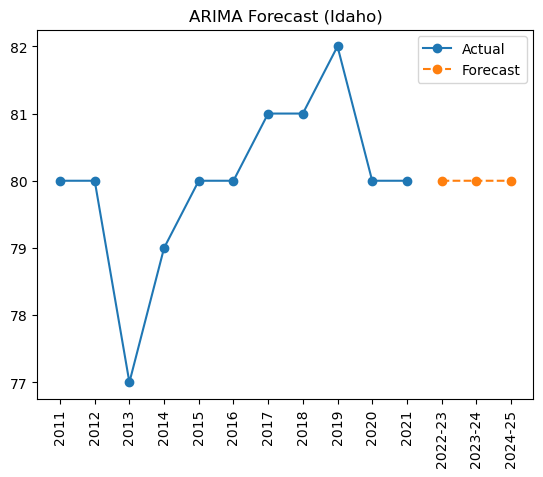

In [131]:
last_year = series.index[-1]
start_year = int(last_year.split('-')[0]) + 1
forecast_labels = [f"{start_year + i}-{start_year + i + 1 - 2000:02d}" for i in range(3)]

all_labels = list(series.index) + forecast_labels
x_ticks = list(range(len(all_labels))) 


plt.plot(series.values, label='Actual', marker='o')

forecast_x = range(len(series), len(series) + 3)
plt.plot(forecast_x, forecast, label='Forecast', marker='o', linestyle='--')

plt.title('ARIMA Forecast (Idaho)')
plt.xticks(x_ticks, all_labels, rotation=90)
plt.legend()
plt.show()

##### ETS Prediction Model for Idaho

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

series = ACGR.loc["Idaho"].dropna()
model = ExponentialSmoothing(series, trend='add', seasonal=None)
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)

print (forecast)

2022-01-01    81.091318
2023-01-01    81.273205
2024-01-01    81.455092
Freq: YS-JAN, dtype: float64


C:\Users\emcdo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


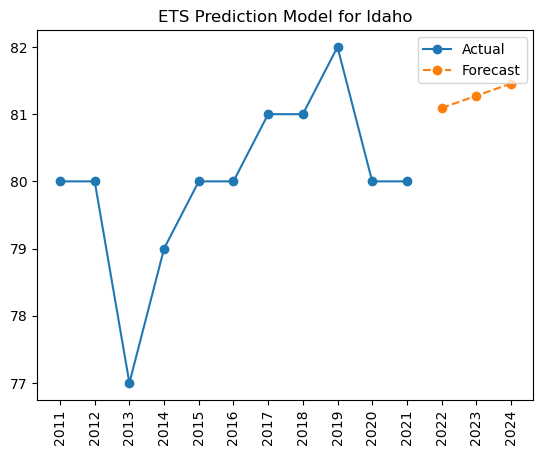

In [133]:
#Future labels
last_year = series.index[-1]
start_year = int(last_year.split('-')[0]) + 1
forecast_labels = [str(start_year + i) for i in range(3)]

#Combine actual and forecast labels
all_labels = list(series.index) + forecast_labels
x_ticks = list(range(len(all_labels))) 


plt.plot(series.values, label='Actual', marker='o')

forecast_x = range(len(series), len(series) + 3)
plt.plot(forecast_x, forecast, label='Forecast', marker='o', linestyle='--')

plt.title('ETS Prediction Model for Idaho')
plt.xticks(x_ticks, all_labels, rotation=90)
plt.legend()
plt.show()

##### Linear Regression Prediction Model for Idaho

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [135]:
df_long = ACGR.reset_index().melt(id_vars='State', var_name='Year', value_name='GradRate')
df_long['Year'] = df_long['Year'].str.slice(0, 4).astype(int)  # Convert '2011-12' → 2011

In [136]:
df_encoded = pd.get_dummies(df_long, columns=['State'], drop_first=True)

In [137]:
X = df_encoded.drop(columns='GradRate')
y = df_encoded['GradRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 2.0044137196024665


C:\Users\emcdo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


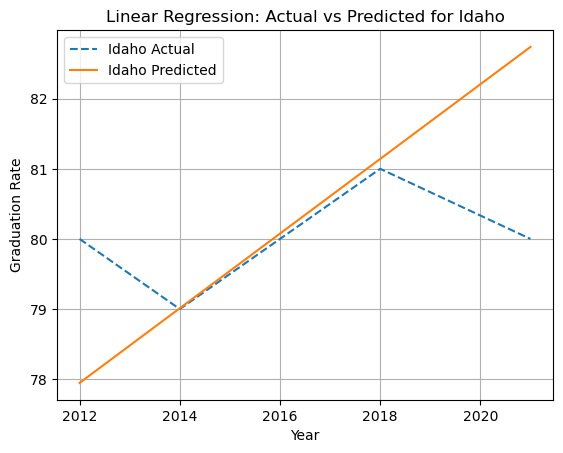

In [138]:
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = y_pred

state_cols = [col for col in X_test.columns if col.startswith('State_')]
X_test_copy['State'] = X_test[state_cols].idxmax(axis=1).str.replace('State_', '')

sample_states = ['Idaho']
X_test_copy['Year'] = X_test['Year']

for state in sample_states:
    state_df = X_test_copy[X_test_copy['State'] == state].sort_values(by='Year')
    plt.plot(state_df['Year'], state_df['Actual'], label=f'{state} Actual', linestyle='--')
    plt.plot(state_df['Year'], state_df['Predicted'], label=f'{state} Predicted')

plt.xlabel("Year")
plt.ylabel("Graduation Rate")
plt.title("Linear Regression: Actual vs Predicted for Idaho")
plt.legend()
plt.grid(True)
plt.show()


##### Random Forest Regression Prediction Model for Idaho

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Use same X_train, X_test, y_train, y_test from above
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 2.086397157145574


C:\Users\emcdo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


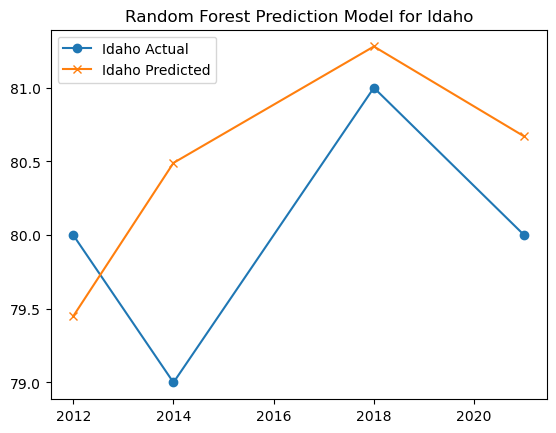

In [140]:
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = rf_pred

state_cols = [col for col in X_test.columns if col.startswith('State_')]
X_test_copy['State'] = X_test[state_cols].idxmax(axis=1).str.replace('State_', '')

X_test_copy['Year'] = X_test['Year']

sample_states = ['Idaho']
sample_df = X_test_copy[X_test_copy['State'].isin(sample_states)]

for state in sample_states:
    subset = sample_df[sample_df['State'] == state].sort_values(by='Year')
    plt.plot(subset['Year'], subset['Actual'], label=f'{state} Actual', marker='o')
    plt.plot(subset['Year'], subset['Predicted'], label=f'{state} Predicted', marker='x')

plt.title('Random Forest Prediction Model for Idaho')
plt.legend()
plt.show()

In [141]:
print(sample_df.sort_values(by='Year'))

     Year  State_Alaska  State_Arizona  State_Arkansas  State_California  \
63   2012         False          False           False             False   
165  2014         False          False           False             False   
369  2018         False          False           False             False   
522  2021         False          False           False             False   

     State_Colorado  State_Connecticut  State_Delaware  \
63            False              False           False   
165           False              False           False   
369           False              False           False   
522           False              False           False   

     State_District of Columbia  State_Florida  ...  State_Utah  \
63                        False          False  ...       False   
165                       False          False  ...       False   
369                       False          False  ...       False   
522                       False          False  ...       Fa

In [142]:
duplicate_check = sample_df.groupby(['State', 'Year']).size().reset_index(name='counts')
print(duplicate_check[duplicate_check['counts'] > 1])

Empty DataFrame
Columns: [State, Year, counts]
Index: []


#### The Linear Regression model most closely matched Actual and Predicted outcomes.  It can also handle multiple states simultaneously.
##### To ensure we're getting the best results, I will also use Random Forest Regression

###  Now to collect the School Spending information for each state

#### National Center for Education Statistics
###### Current expenditures per pupil in fall enrollment in public elementary and secondary schools, by state or jurisdiction: Selected school years, 1969-70 through 2020-21
    
    

In [143]:
tables = pd.read_html("https://nces.ed.gov/programs/digest/d23/tables/dt23_236.65.asp?current=yes")

spending = tables[2]

In [144]:
print(spending.head(2))

  State or jurisdiction Unadjusted dollars1                            \
  State or jurisdiction             1969-70 1979-80 1989-90 1999-2000   
                      1                   2       3       4         5   
0         United States                $751  $2,088  $4,643    $6,912   
1               Alabama                 512    1520    3144      5638   

                                                ... Constant 2022-23 dollars2  \
   2010-11  2011-12  2012-13  2013-14  2014-15  ...                   2014-15   
         6        7        8        9       10  ...                        25   
0  $10,663  $10,648  $10,771  $11,066  $11,445  ...                   $14,491   
1     8726     8577     8773     9036     9146  ...                     11581   

                                                                        
   2015-16  2016-17  2017-18  2018-19      2019-203      2020-213       
        26       27       28       29 29.1       30 30.1       31 31.1  
0  $14,89

In [145]:
print(spending.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   (State or jurisdiction, State or jurisdiction, 1)  66 non-null     object
 1   (Unadjusted dollars1, 1969-70, 2)                  65 non-null     object
 2   (Unadjusted dollars1, 1979-80, 3)                  65 non-null     object
 3   (Unadjusted dollars1, 1989-90, 4)                  65 non-null     object
 4   (Unadjusted dollars1, 1999-2000, 5)                65 non-null     object
 5   (Unadjusted dollars1, 2010-11, 6)                  65 non-null     object
 6   (Unadjusted dollars1, 2011-12, 7)                  65 non-null     object
 7   (Unadjusted dollars1, 2012-13, 8)                  65 non-null     object
 8   (Unadjusted dollars1, 2013-14, 9)                  65 non-null     object
 9   (Unadjusted dollars1, 2

In [146]:
#removing Constant rows, which are unneeded
spending = spending.drop(spending.columns[1:24], axis=1)
print(spending.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   (State or jurisdiction, State or jurisdiction, 1)  66 non-null     object
 1   (Constant 2022-23 dollars2, 2011-12, 22)           65 non-null     object
 2   (Constant 2022-23 dollars2, 2012-13, 23)           65 non-null     object
 3   (Constant 2022-23 dollars2, 2013-14, 24)           65 non-null     object
 4   (Constant 2022-23 dollars2, 2014-15, 25)           65 non-null     object
 5   (Constant 2022-23 dollars2, 2015-16, 26)           65 non-null     object
 6   (Constant 2022-23 dollars2, 2016-17, 27)           65 non-null     object
 7   (Constant 2022-23 dollars2, 2017-18, 28)           65 non-null     object
 8   (Constant 2022-23 dollars2, 2018-19, 29)           65 non-null     object
 9   (Constant 2022-23 dolla

In [147]:
#Removing the disclaimer and non-state information from the end
spending = spending.drop(spending.columns[10:14], axis=1)
print(spending.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   (State or jurisdiction, State or jurisdiction, 1)  66 non-null     object
 1   (Constant 2022-23 dollars2, 2011-12, 22)           65 non-null     object
 2   (Constant 2022-23 dollars2, 2012-13, 23)           65 non-null     object
 3   (Constant 2022-23 dollars2, 2013-14, 24)           65 non-null     object
 4   (Constant 2022-23 dollars2, 2014-15, 25)           65 non-null     object
 5   (Constant 2022-23 dollars2, 2015-16, 26)           65 non-null     object
 6   (Constant 2022-23 dollars2, 2016-17, 27)           65 non-null     object
 7   (Constant 2022-23 dollars2, 2017-18, 28)           65 non-null     object
 8   (Constant 2022-23 dollars2, 2018-19, 29)           65 non-null     object
 9   (Constant 2022-23 dolla

In [148]:
print(spending.head(2))

  State or jurisdiction Constant 2022-23 dollars2                             \
  State or jurisdiction                   2011-12  2012-13  2013-14  2014-15   
                      1                        22       23       24       25   
0         United States                   $14,022  $13,952  $14,114  $14,491   
1               Alabama                     11295    11364    11525    11581   

                                            
   2015-16  2016-17  2017-18  2018-19       
        26       27       28       29 29.1  
0  $14,894  $15,142  $15,277  $15,606  NaN  
1    11644    11767    11736    11959  NaN  


In [149]:
#Flattening the Multi-index
spending.columns = [col[1] for col in spending.columns]

print(spending.head(2))

  State or jurisdiction  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0         United States  $14,022  $13,952  $14,114  $14,491  $14,894  $15,142   
1               Alabama    11295    11364    11525    11581    11644    11767   

   2017-18  2018-19 2018-19  
0  $15,277  $15,606     NaN  
1    11736    11959     NaN  


In [150]:
#Changing the column names to reflect the period when spending started for that school year to facilitate tracking
spending.columns = [col[:4] for col in spending.columns]
print(spending.head(2))

            Stat     2011     2012     2013     2014     2015     2016  \
0  United States  $14,022  $13,952  $14,114  $14,491  $14,894  $15,142   
1        Alabama    11295    11364    11525    11581    11644    11767   

      2017     2018 2018  
0  $15,277  $15,606  NaN  
1    11736    11959  NaN  


In [151]:
#Correcting 'stat' column head
spending = spending.rename(columns={"Stat": "State"})
print(spending.head(2))

           State     2011     2012     2013     2014     2015     2016  \
0  United States  $14,022  $13,952  $14,114  $14,491  $14,894  $15,142   
1        Alabama    11295    11364    11525    11581    11644    11767   

      2017     2018 2018  
0  $15,277  $15,606  NaN  
1    11736    11959  NaN  


In [152]:
#Getting rid of the last column, as its information would now be incomplete
spending = spending.iloc[:, :-1]
print(spending.head(2))

           State     2011     2012     2013     2014     2015     2016  \
0  United States  $14,022  $13,952  $14,114  $14,491  $14,894  $15,142   
1        Alabama    11295    11364    11525    11581    11644    11767   

      2017     2018  
0  $15,277  $15,606  
1    11736    11959  


In [153]:
#looking at everything after the first 50 states
print(spending['State'].iloc[49:])

49                                       South Carolina
50                                         South Dakota
51                                            Tennessee
52                                                Texas
53                                                 Utah
54                                                  NaN
55                                              Vermont
56                                             Virginia
57                                           Washington
58                                        West Virginia
59                                            Wisconsin
60                                              Wyoming
61                                                  NaN
62                                  Other jurisdictions
63                                       American Samoa
64                                                 Guam
65                                    Northern Marianas
66                                          Puer

In [154]:
#Removing everything after the final state
spending = spending.iloc[:61]
print(spending.tail())

            State   2011   2012   2013   2014   2015   2016   2017   2018
56       Virginia  14033  14197  13973  14226  14382  14679  14764  14959
57     Washington  12648  12584  13143  13528  14444  14784  15684  16970
58  West Virginia  15248  14591  14503  14577  14369  14505  13976  14518
59      Wisconsin  14793  14489  14470  14609  14670  14948  15032  15016
60        Wyoming  21055  20486  20284  20320  20666  20394  19487  19202


In [155]:
print(spending)

            State     2011     2012     2013     2014     2015     2016  \
0   United States  $14,022  $13,952  $14,114  $14,491  $14,894  $15,142   
1         Alabama    11295    11364    11525    11581    11644    11767   
2          Alaska    23014    23598    23552    25566    22023    22030   
3         Arizona     9723     9708     9472     9611     9775     9946   
4        Arkansas    12558    12356    12438    12415    12452    12355   
..            ...      ...      ...      ...      ...      ...      ...   
56       Virginia    14033    14197    13973    14226    14382    14679   
57     Washington    12648    12584    13143    13528    14444    14784   
58  West Virginia    15248    14591    14503    14577    14369    14505   
59      Wisconsin    14793    14489    14470    14609    14670    14948   
60        Wyoming    21055    20486    20284    20320    20666    20394   

       2017     2018  
0   $15,277  $15,606  
1     11736    11959  
2     21409    21764  
3     1

In [156]:
#Getting rid of "United States" row
spending = spending.iloc[1:]
print(spending)

                   State   2011   2012   2013   2014   2015   2016   2017  \
1                Alabama  11295  11364  11525  11581  11644  11767  11736   
2                 Alaska  23014  23598  23552  25566  22023  22030  21409   
3                Arizona   9723   9708   9472   9611   9775   9946  10112   
4               Arkansas  12558  12356  12438  12415  12452  12355  12281   
5             California  12142  11993  12335  13230  14364  15007  15296   
6                    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7               Colorado  11318  11261  11525  11765  12098  12164  12365   
8            Connecticut  22197  22437  23469  24083  24670  24613  24334   
9               Delaware  17884  17685  17592  17577  18108  18392  18457   
10  District of Columbia  26136  26491  26194  26097  26615  27863  27974   
11               Florida  11220  11170  11421  11539  11541  11577  11671   
12                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

In [157]:
#The data was formatted to have blank rows in the middle of the data every 6 lines.  These are being removed.
EmptyRows = [6, 12, 18, 24, 30, 36, 42, 48, 54]
spending = spending.drop(index=EmptyRows)
spending = spending.reset_index(drop=True)
print(spending)

                   State   2011   2012   2013   2014   2015   2016   2017  \
0                Alabama  11295  11364  11525  11581  11644  11767  11736   
1                 Alaska  23014  23598  23552  25566  22023  22030  21409   
2                Arizona   9723   9708   9472   9611   9775   9946  10112   
3               Arkansas  12558  12356  12438  12415  12452  12355  12281   
4             California  12142  11993  12335  13230  14364  15007  15296   
5               Colorado  11318  11261  11525  11765  12098  12164  12365   
6            Connecticut  22197  22437  23469  24083  24670  24613  24334   
7               Delaware  17884  17685  17592  17577  18108  18392  18457   
8   District of Columbia  26136  26491  26194  26097  26615  27863  27974   
9                Florida  11220  11170  11421  11539  11541  11577  11671   
10               Georgia  12211  11816  11780  11999  12370  12688  12996   
11                Hawaii  15767  15272  15815  16277  17292  17687  18409   

In [158]:
spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   2011    51 non-null     object
 2   2012    51 non-null     object
 3   2013    51 non-null     object
 4   2014    51 non-null     object
 5   2015    51 non-null     object
 6   2016    51 non-null     object
 7   2017    51 non-null     object
 8   2018    51 non-null     object
dtypes: object(9)
memory usage: 3.7+ KB


In [159]:
#Setting the first column to be the row labels
spending = spending.set_index(spending.columns[0])
print(spending)

                       2011   2012   2013   2014   2015   2016   2017   2018
State                                                                       
Alabama               11295  11364  11525  11581  11644  11767  11736  11959
Alaska                23014  23598  23552  25566  22023  22030  21409  21764
Arizona                9723   9708   9472   9611   9775   9946  10112  10381
Arkansas              12558  12356  12438  12415  12452  12355  12281  12320
California            12142  11993  12335  13230  14364  15007  15296  16141
Colorado              11318  11261  11525  11765  12098  12164  12365  13101
Connecticut           22197  22437  23469  24083  24670  24613  24334  25014
Delaware              17884  17685  17592  17577  18108  18392  18457  18848
District of Columbia  26136  26491  26194  26097  26615  27863  27974  27197
Florida               11220  11170  11421  11539  11541  11577  11671  11817
Georgia               12211  11816  11780  11999  12370  12688  12996  13257

In [160]:
print(spending.dtypes)

2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
dtype: object


In [161]:
#Setting dtype to 'numeric' for easier tracking and comparison
spending = spending.apply(pd.to_numeric, errors='coerce')
print(spending.dtypes)

2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
dtype: object


In [162]:
#checking for null values
print(spending.isnull().sum())

2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64


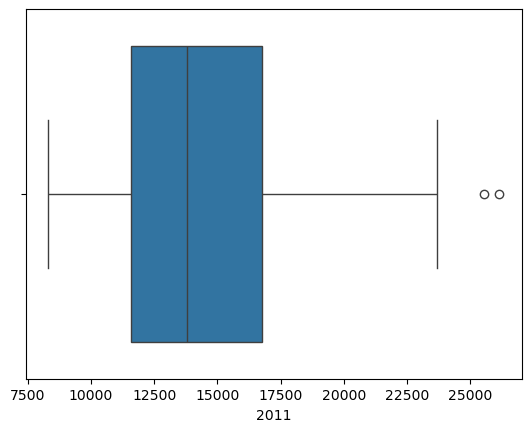

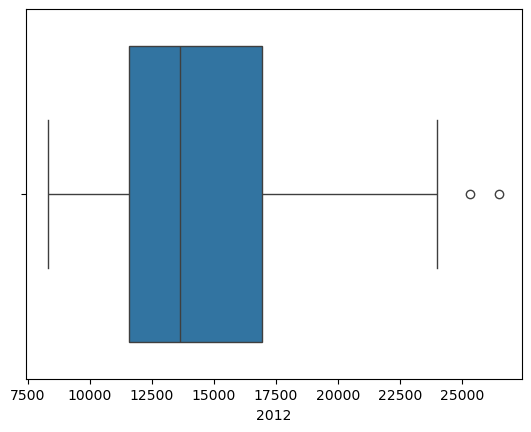

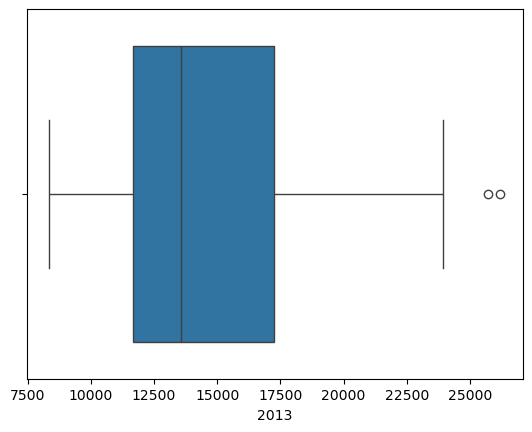

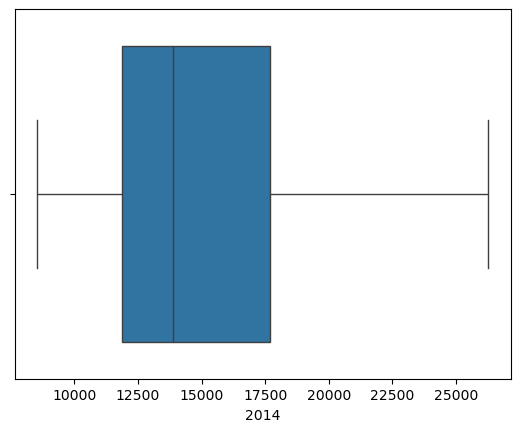

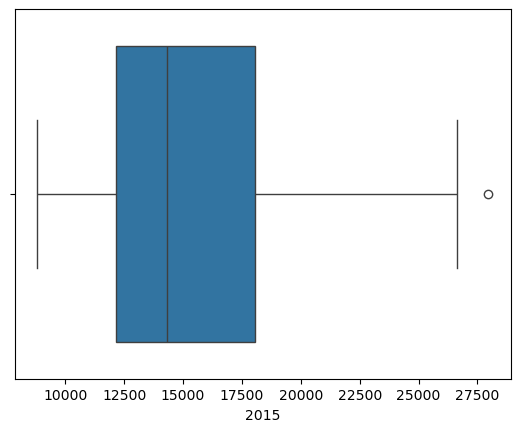

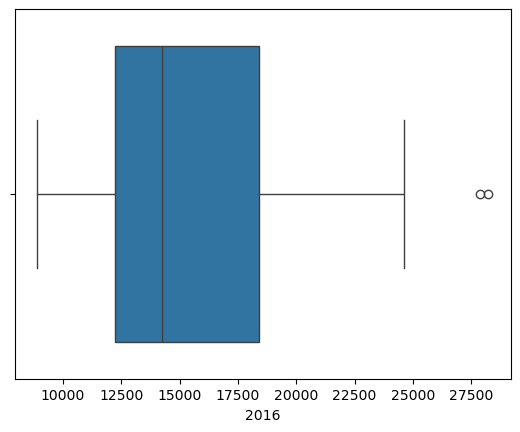

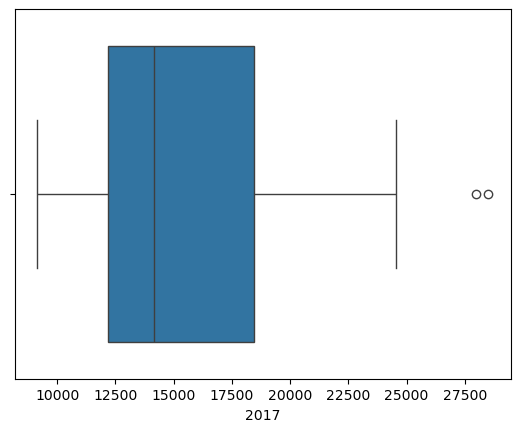

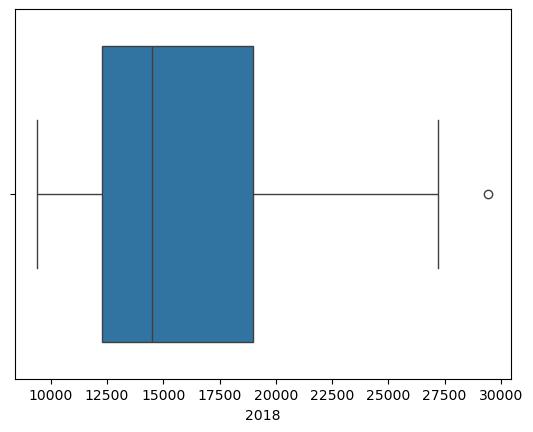

In [163]:
for col in spending.columns:
    sns.boxplot(x=spending[col])
    plt.show()

##### Only dates before 2020 will be used, as spending models and results became drastically skewed by the Covid 19 pandemic around 2020.

##### We now have spending data, state by state, for 2011 through 2018. 
##### We also have the graduation rate data for each state, so it's time to start looking at comparisons.

In [164]:
# Reshape spending and ACGR so each has columns: 'Year', 'Spending' or 'GraduationRate'
spending_long = spending.melt(var_name='Year', value_name='Spending')
acgr_long = ACGR.melt(var_name='Year', value_name='GraduationRate')

# Merge on 'Year'
merged = pd.merge(spending_long, acgr_long, on='Year')

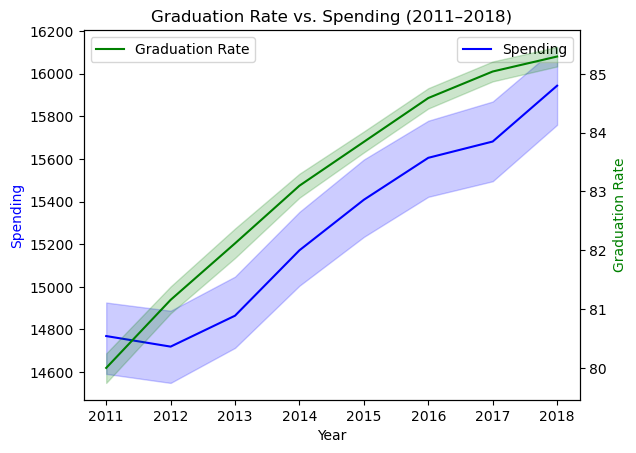

In [165]:
fig, ax1 = plt.subplots()

sns.lineplot(x='Year', y='Spending', data=merged, ax=ax1, color='blue', label='Spending')
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='GraduationRate', data=merged, ax=ax2, color='green', label='Graduation Rate')

ax1.set_ylabel('Spending', color='blue')
ax2.set_ylabel('Graduation Rate', color='green')
ax1.set_xlabel('Year')
plt.title('Graduation Rate vs. Spending (2011–2018)')
plt.show()

### Right off the bat, we can see what looks like a rather strong linear relationship between spending and graduation rate.  The higher one is, the other follows fairly closely.
##### I do find it interesting that 2011 disagrees with that trend.  I'll have to try to find that data and see if this is, perhaps, a recent trend that has changed since 2010...

### Let's be more precise in that comparison; just how closely DOES the change match between spending and graduation?

In [166]:
merged['Spending_pct_change'] = merged['Spending'].pct_change() * 100
merged['GraduationRate_pct_change'] = merged['GraduationRate'].pct_change() * 100

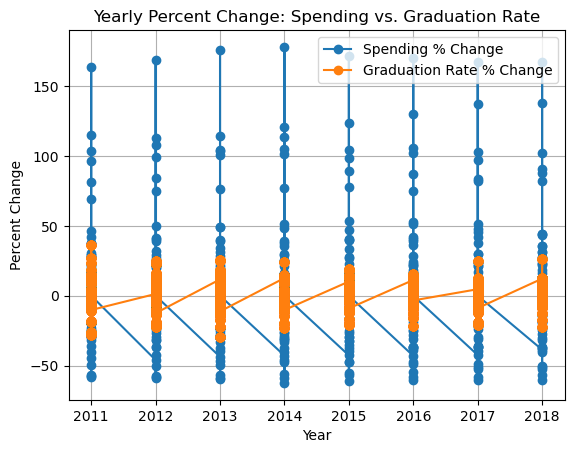

In [167]:
plt.plot(merged['Year'], merged['Spending_pct_change'], marker='o', label='Spending % Change')
plt.plot(merged['Year'], merged['GraduationRate_pct_change'], marker='o', label='Graduation Rate % Change')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Yearly Percent Change: Spending vs. Graduation Rate')
plt.legend()
plt.grid(True)
plt.show()

#### I'm seeing quite a lot of shifting around of how much is spent between one year and the next
#### Interestingly, the graduation rate does NOT change much, or slowly if it does, suggesting the two are not necessarily causationally related...but we need more information before we can settle on that.

### Let's run some more correlation models!

In [168]:
corr = merged['Spending'].corr(merged['GraduationRate'], method='pearson')
print(f"Pearson correlation coefficient: {corr}")

Pearson correlation coefficient: 0.02823205194877331


In [169]:
r, p = pearsonr(merged['Spending'], merged['GraduationRate'])
print(f"Pearson r: {r}, p-value: {p}")

Pearson r: 0.0282320519487733, p-value: 4.640454354070636e-05


##### A Pearson correlation that low suggests there is almost no confirmed correlation between the two!
##### And the p-value suggests there is a real relationship between the two, even though it appears to be weak.

#### Let's take a look at each state invdividually to see if the pattern is consistently true there as well:

In [170]:
years = [str(y) for y in range(2011, 2019)] 

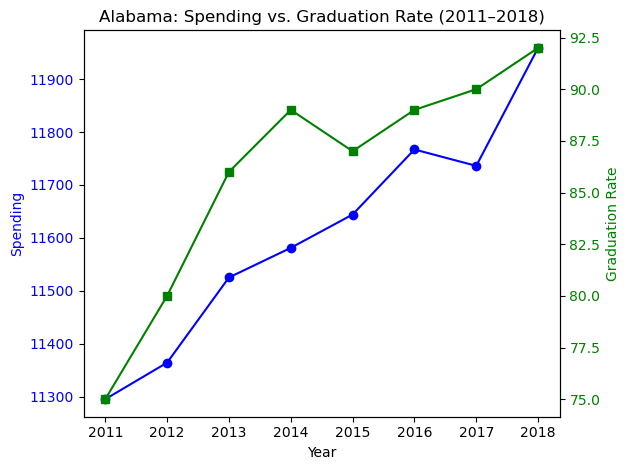

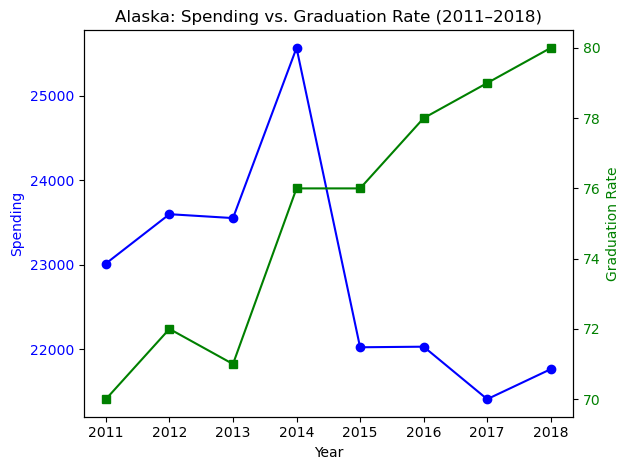

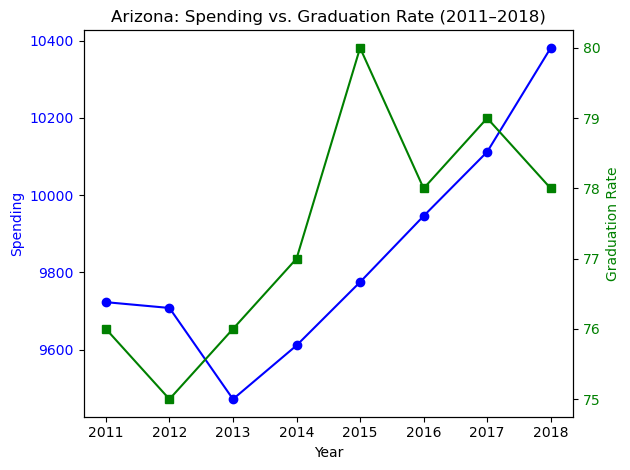

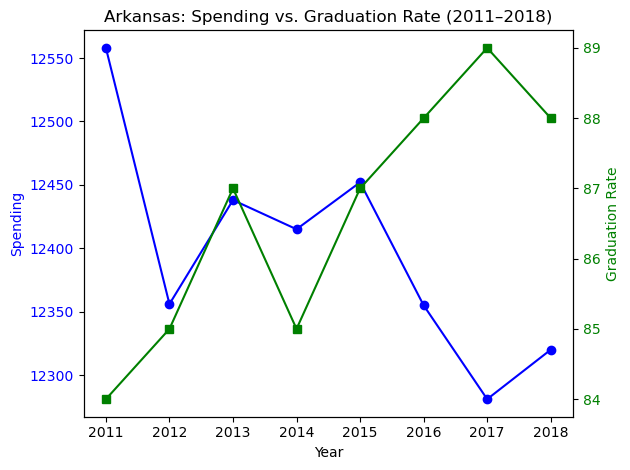

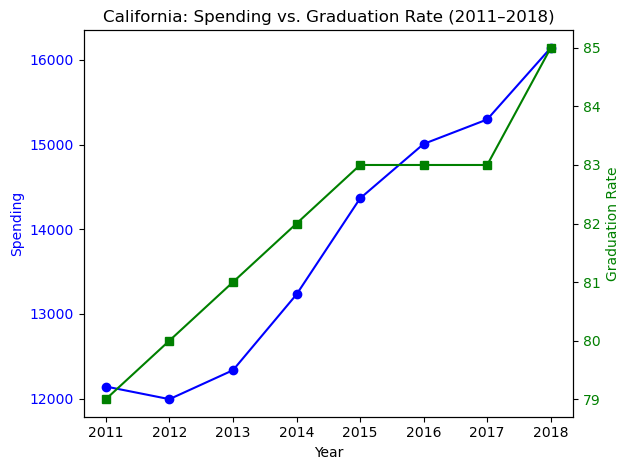

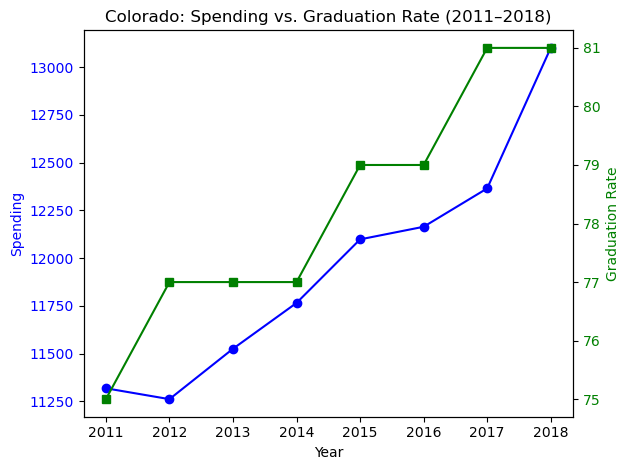

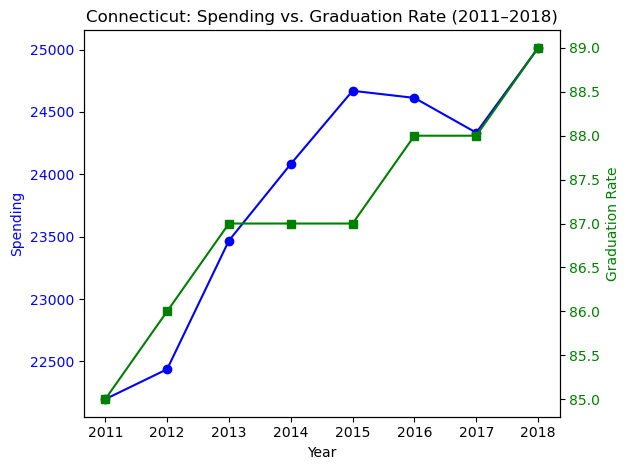

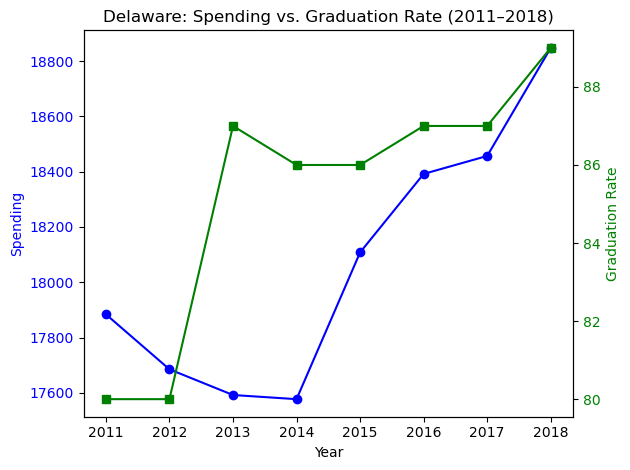

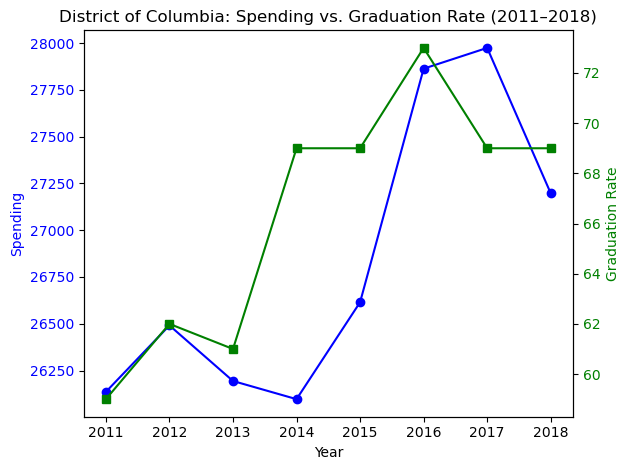

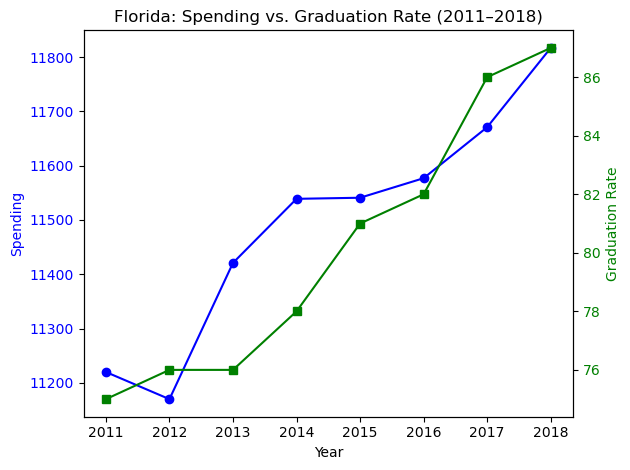

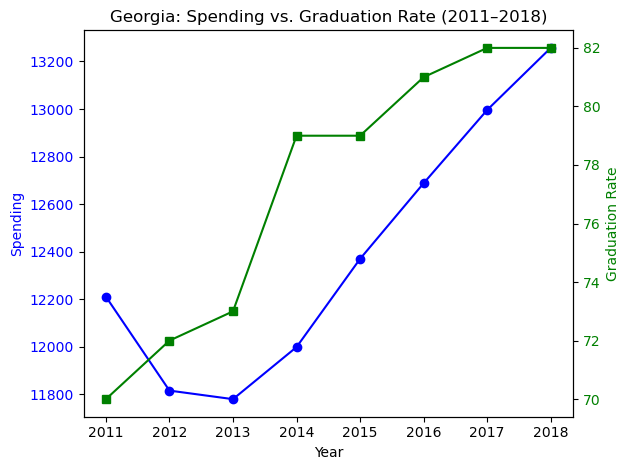

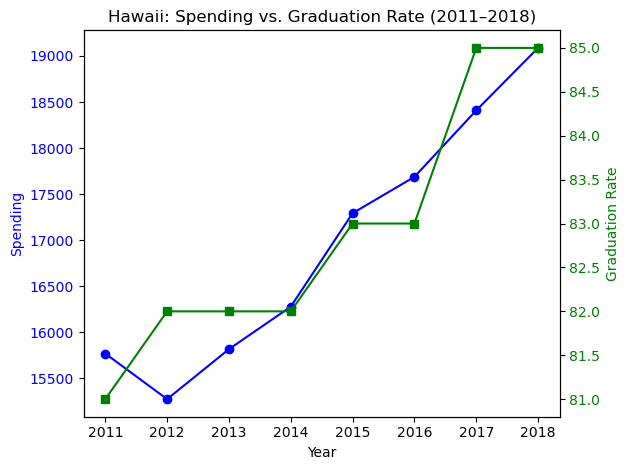

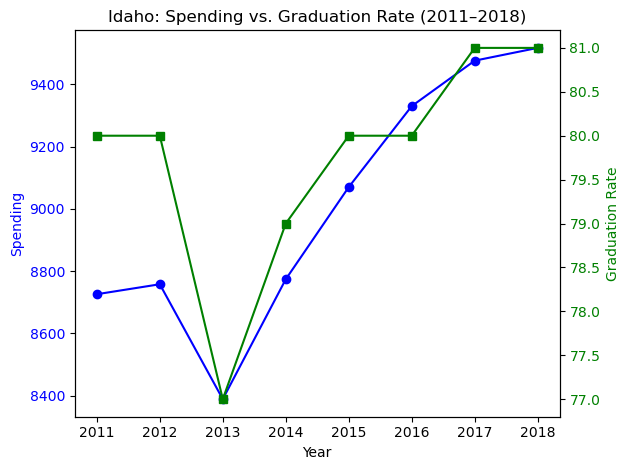

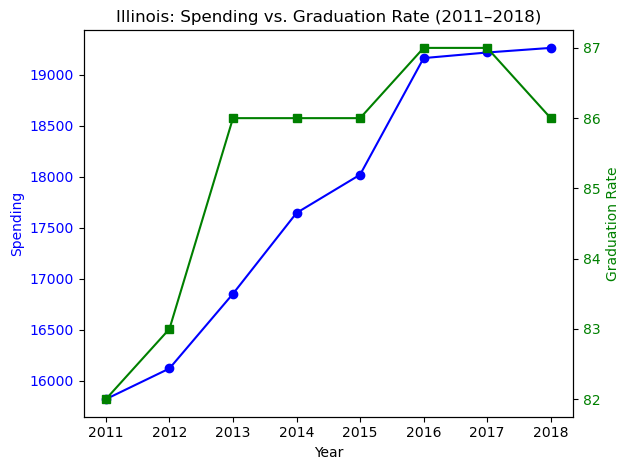

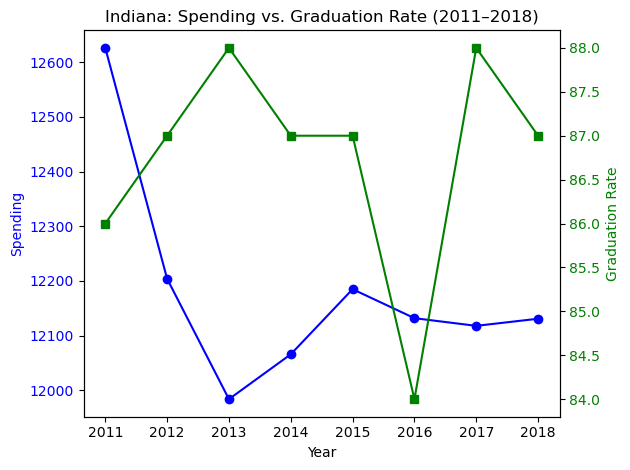

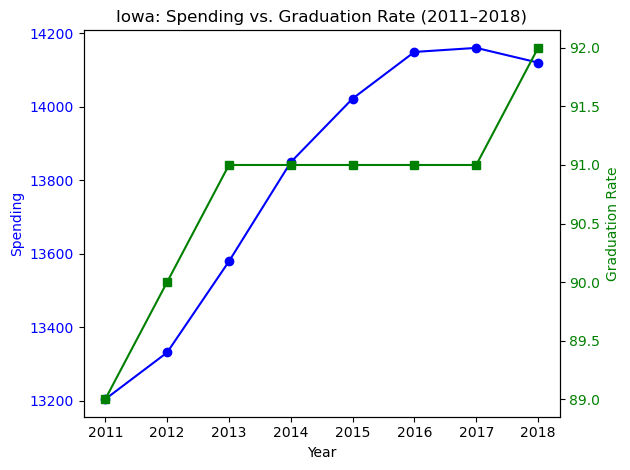

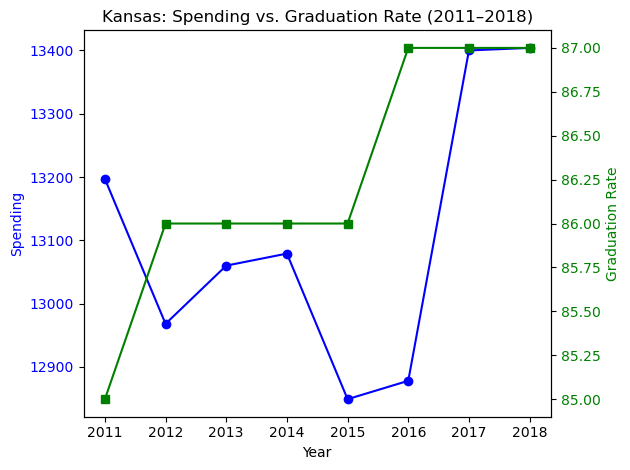

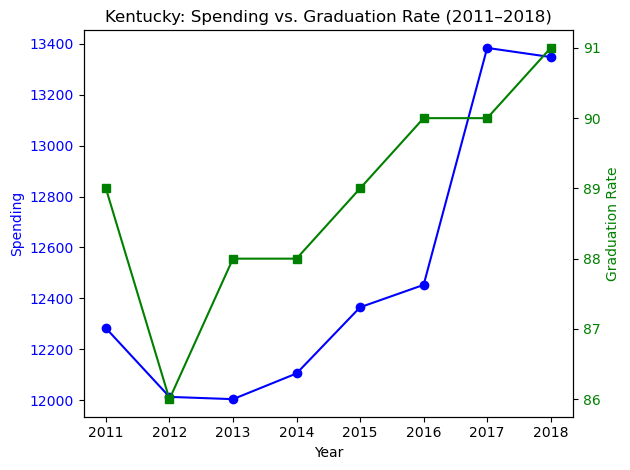

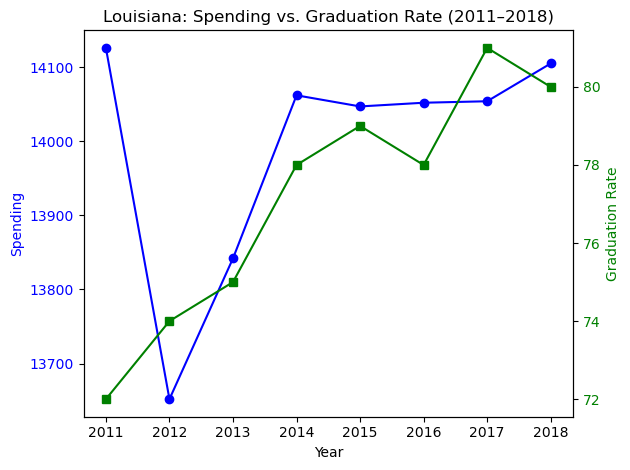

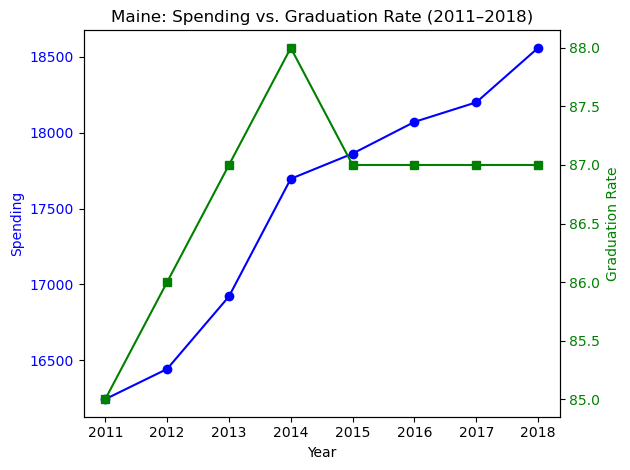

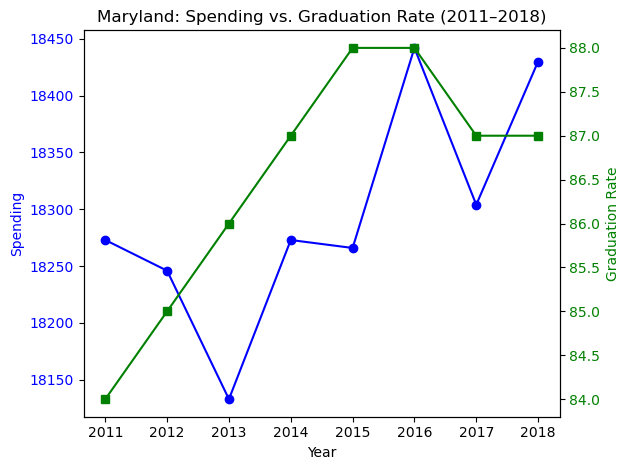

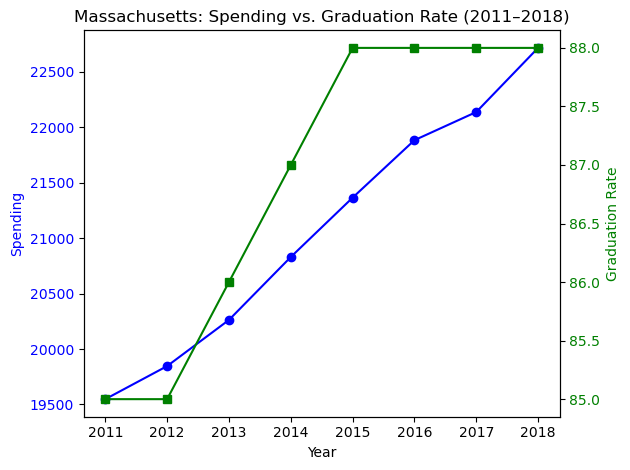

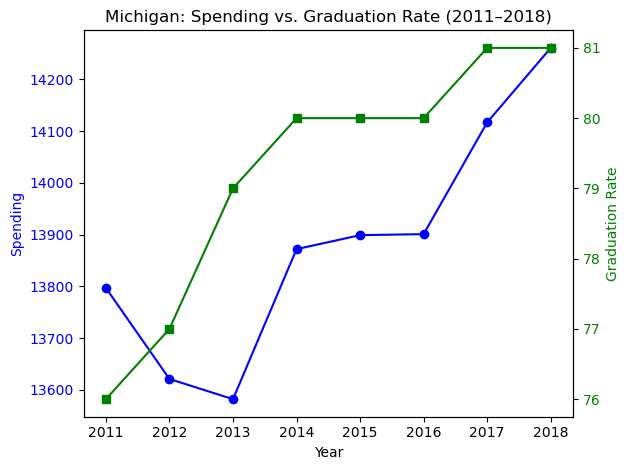

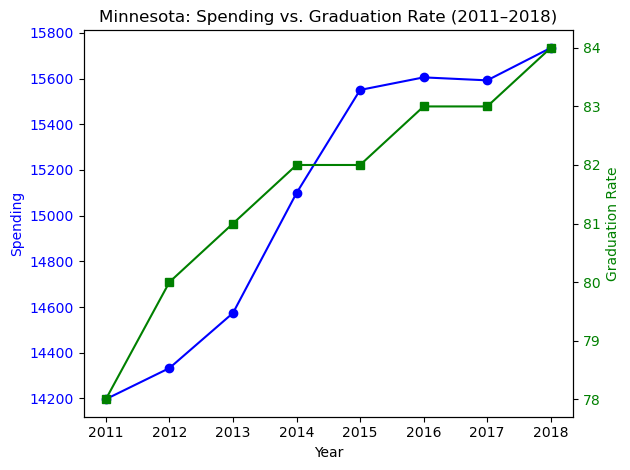

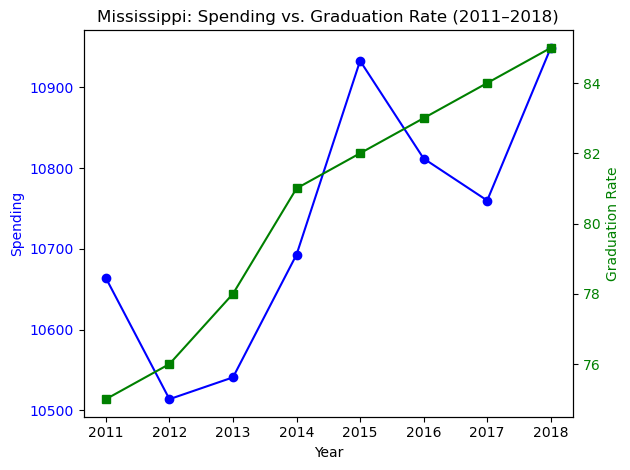

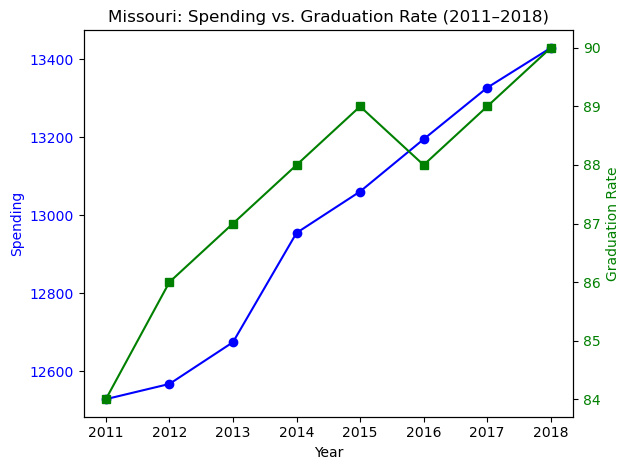

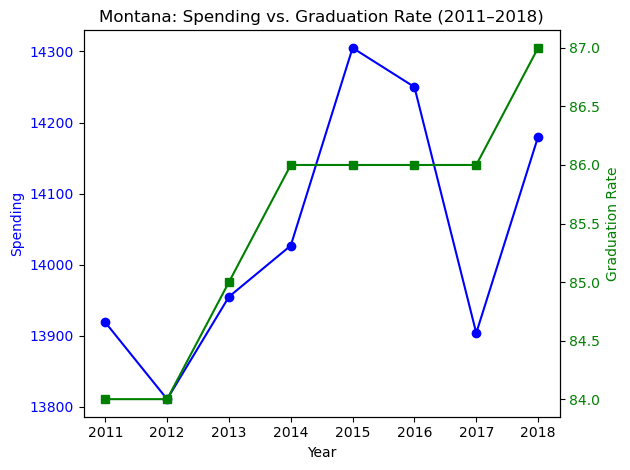

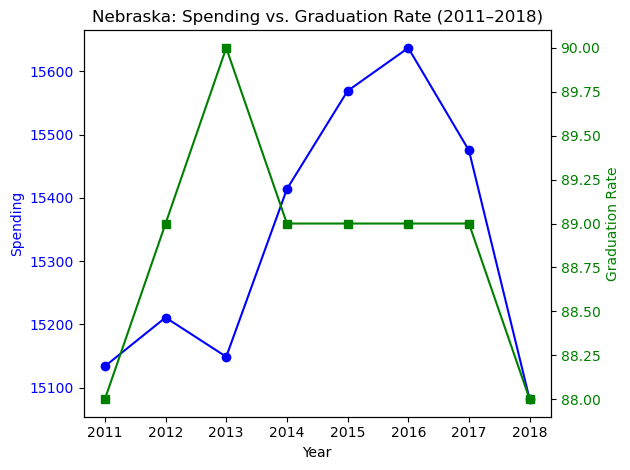

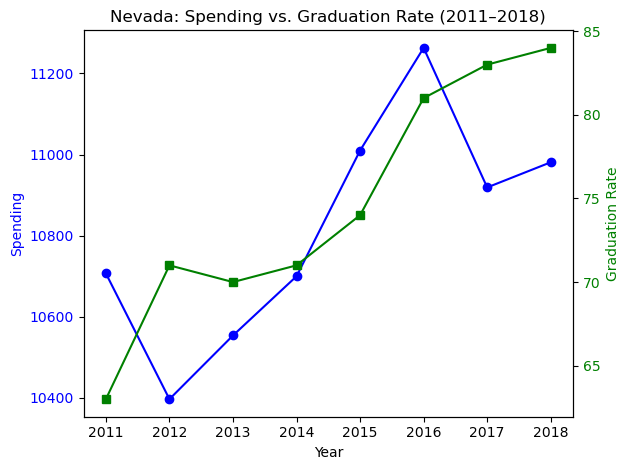

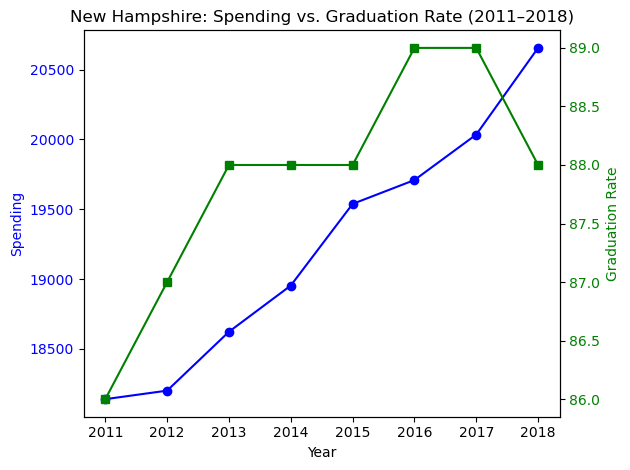

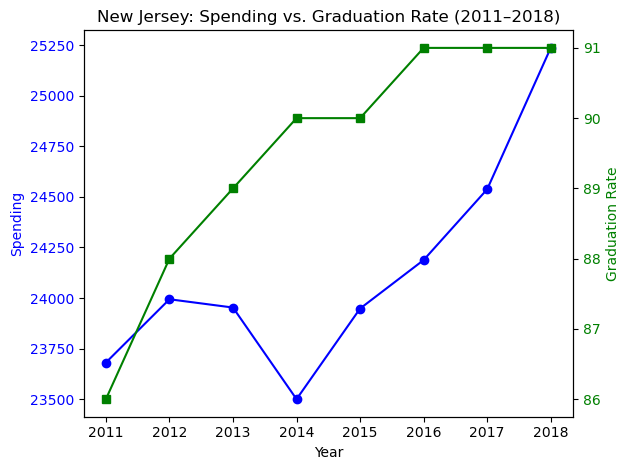

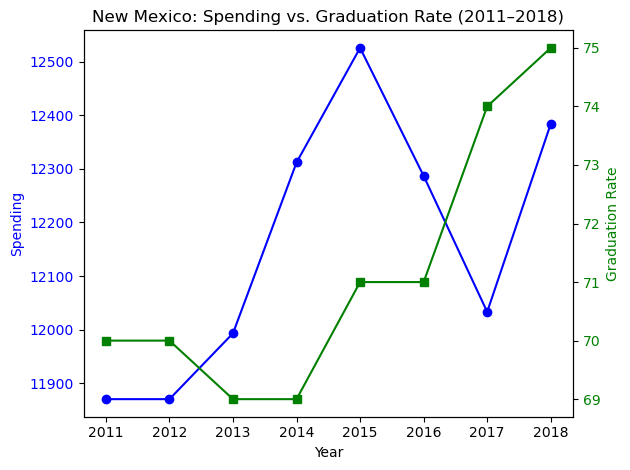

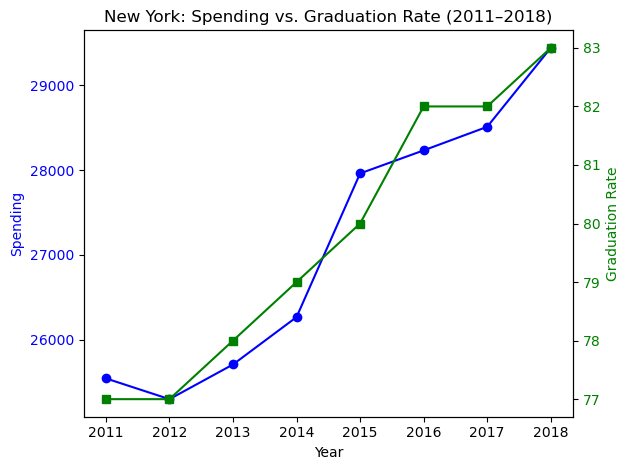

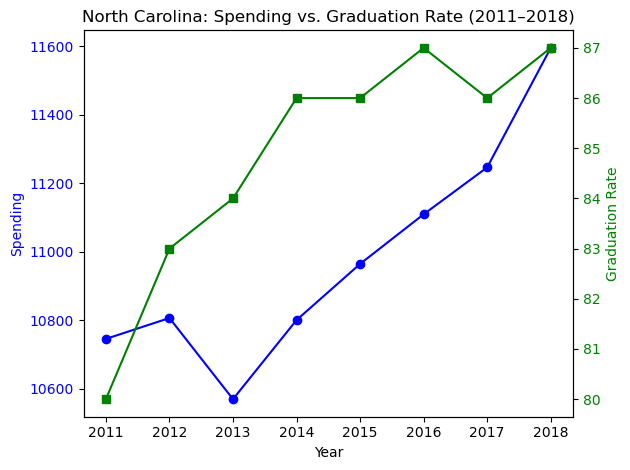

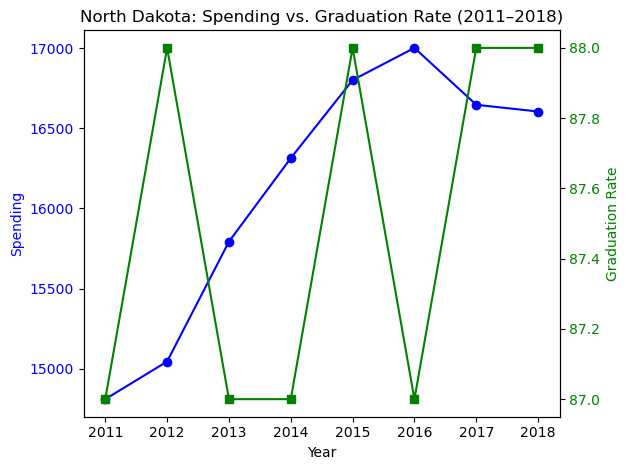

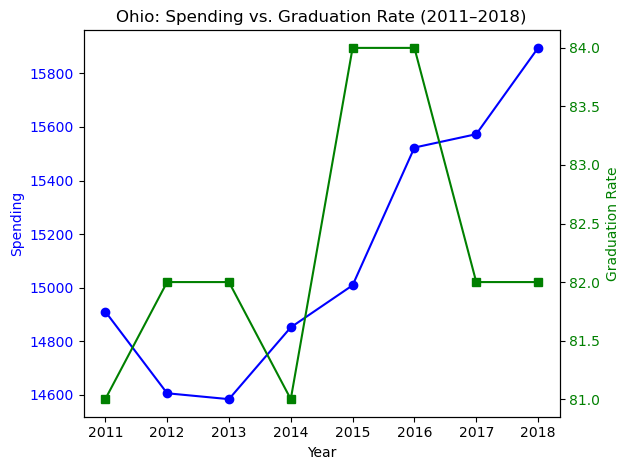

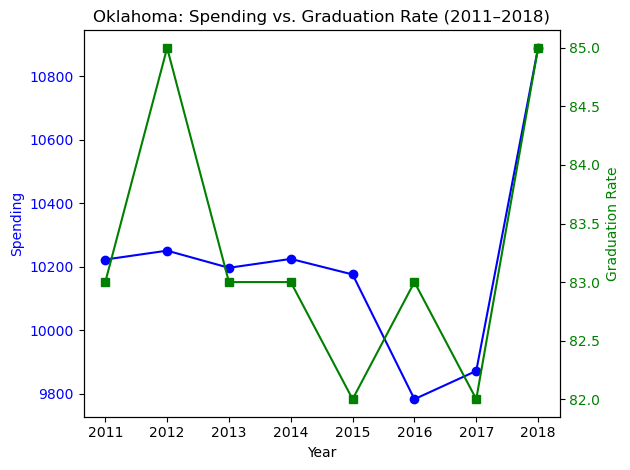

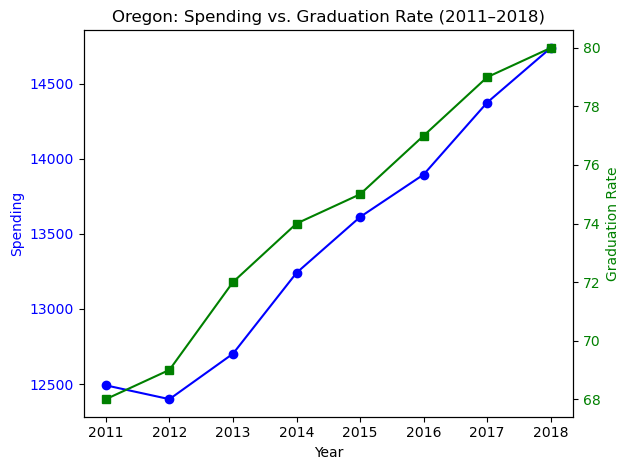

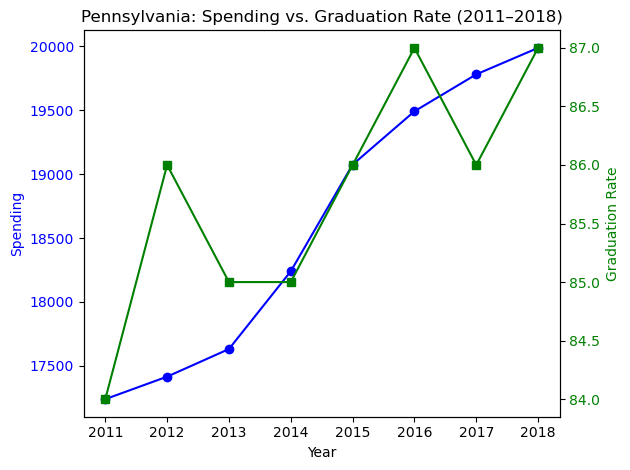

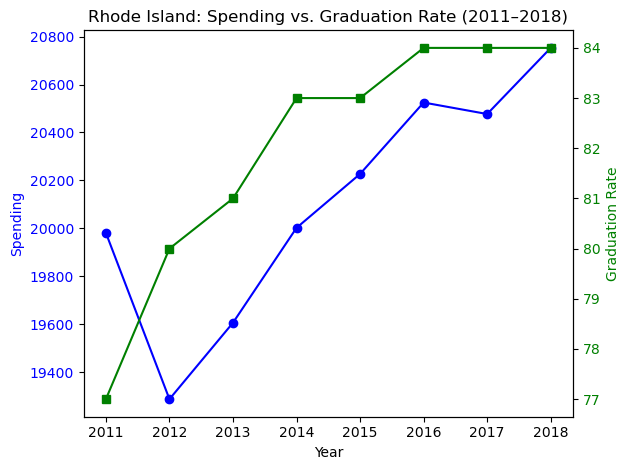

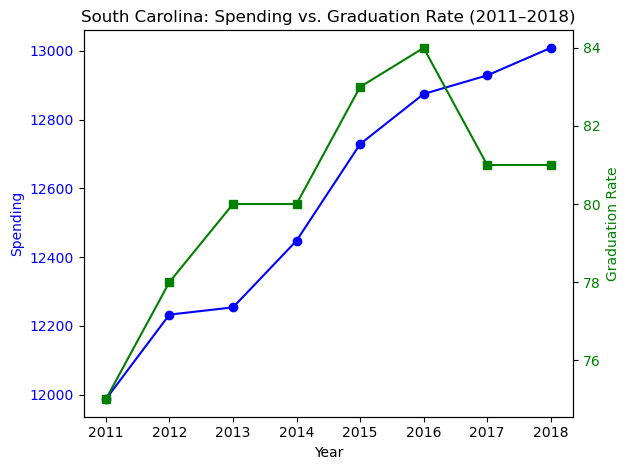

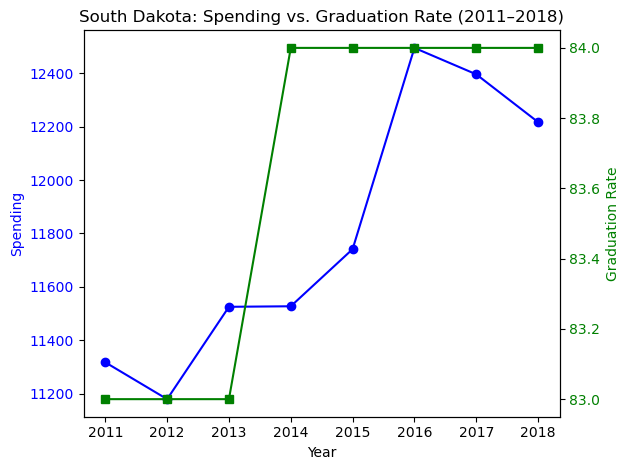

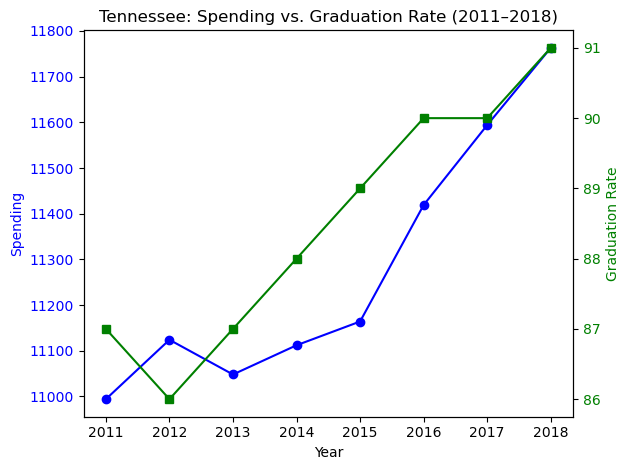

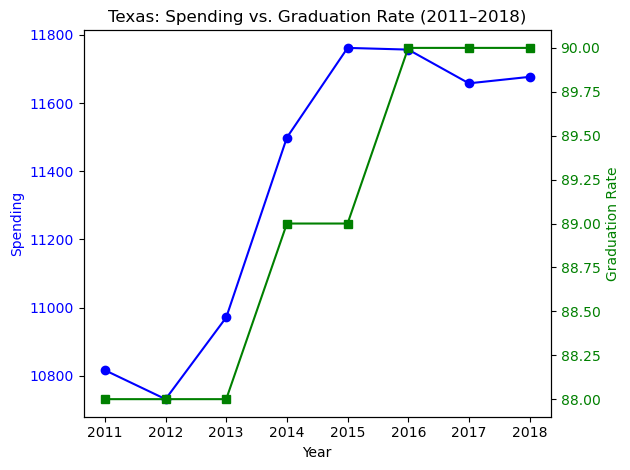

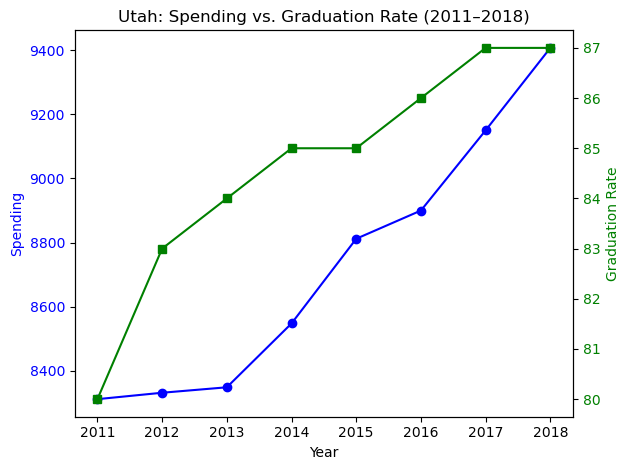

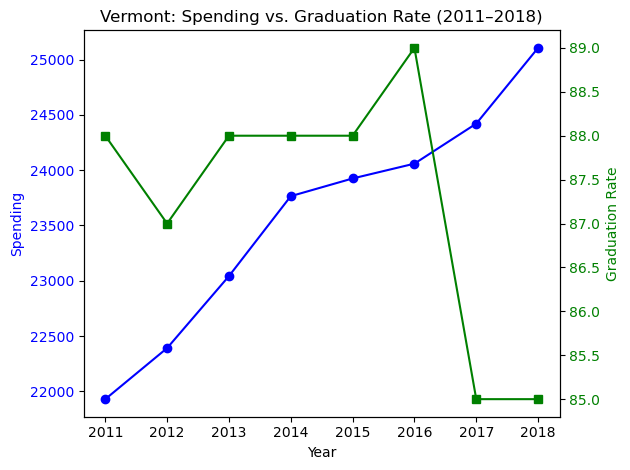

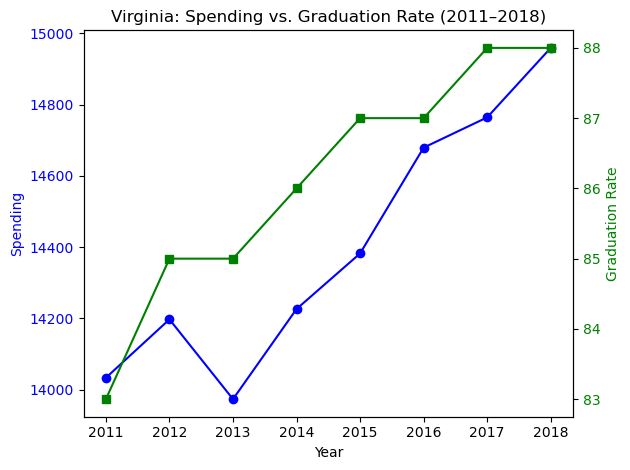

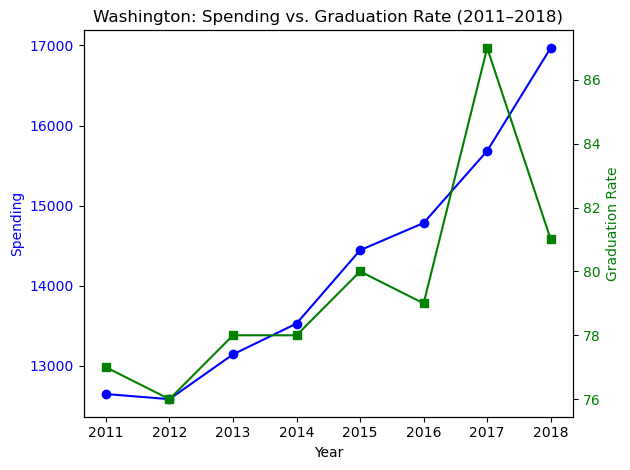

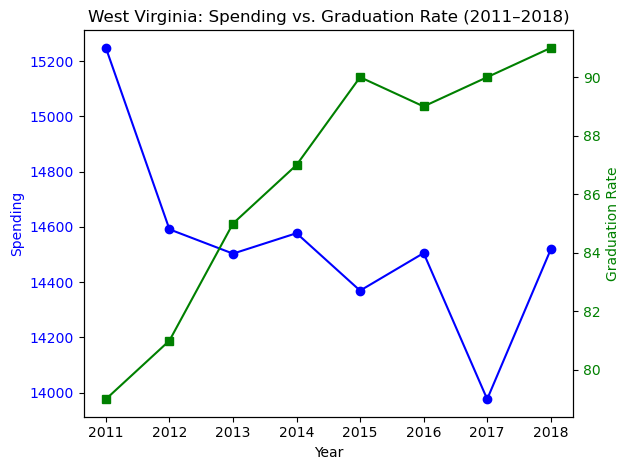

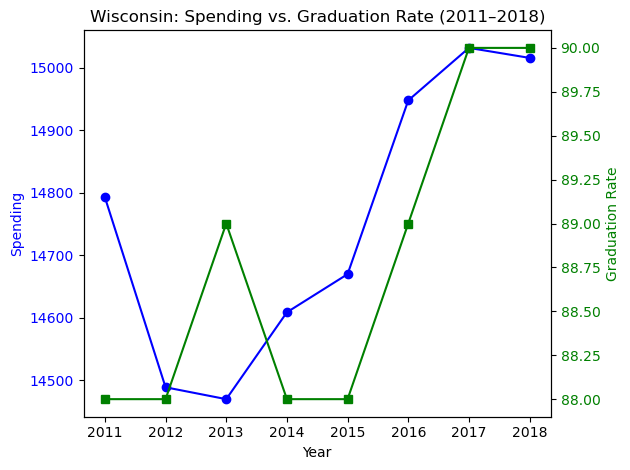

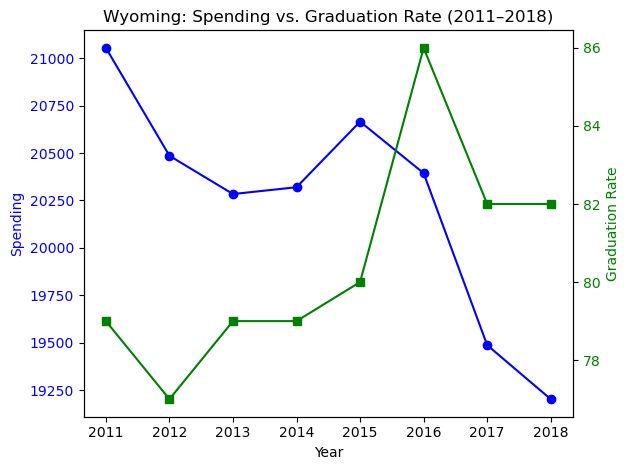

In [171]:
for state in spending.index:
    fig, ax1 = plt.subplots()
    
    #Spending
    ax1.plot(years, spending.loc[state, years], color='blue', marker='o', label='Spending')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Spending', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    #Graduation Rate
    ax2 = ax1.twinx()
    ax2.plot(years, ACGR.loc[state, years], color='green', marker='s', label='Graduation Rate')
    ax2.set_ylabel('Graduation Rate', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.title(f"{state}: Spending vs. Graduation Rate (2011–2018)")
    fig.tight_layout()
    plt.show()

### It is much easier to see why we received those Pearson numbers when we look at each state individually!
##### When we look at all of them together, it looks like there is a very close linear relationship, but the state-by-state information is much more informative.  It is true there is some matching, but there are also many instances of a negative relationship between spending and graduation rate!

## The numbers are calculated based on a cost per student, so let's compare per-student spending from one state to the next.

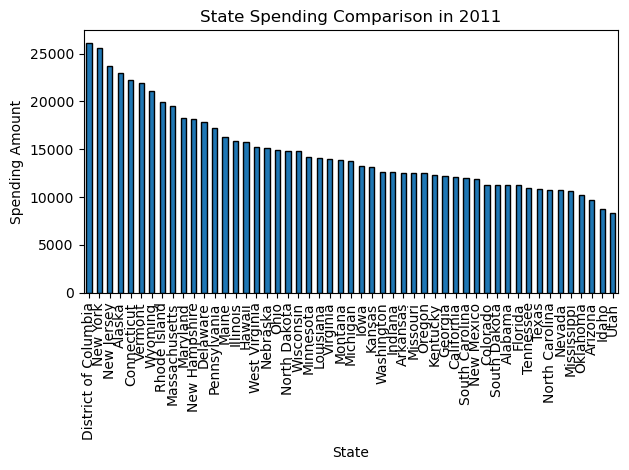

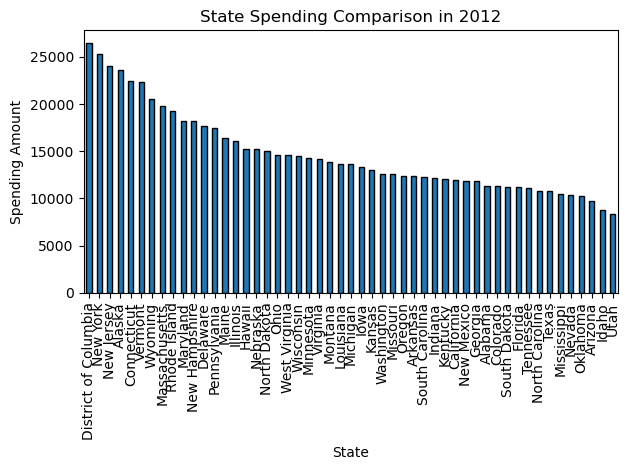

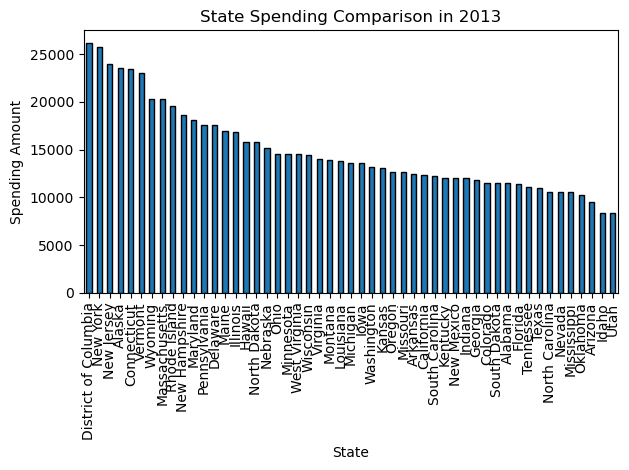

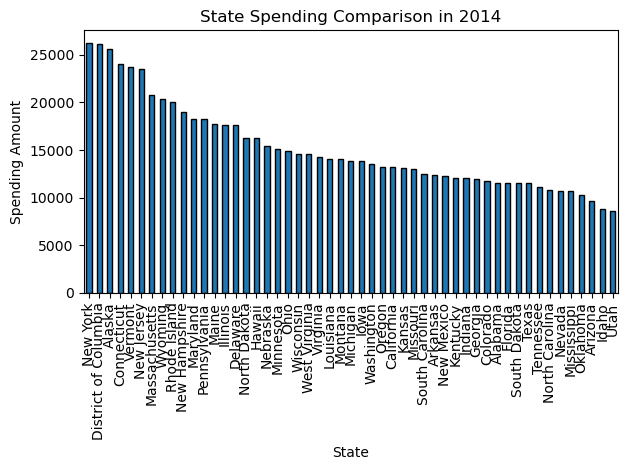

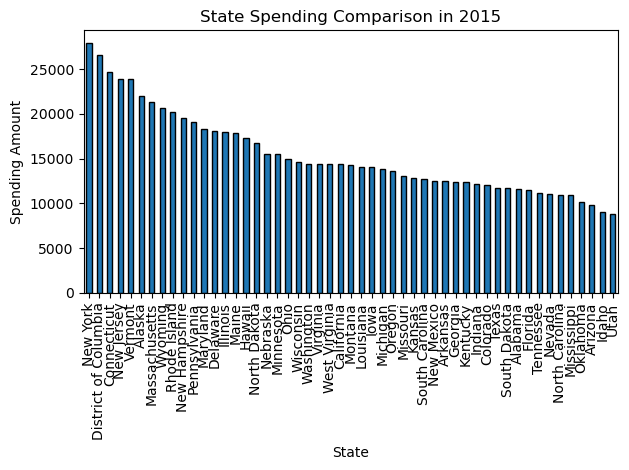

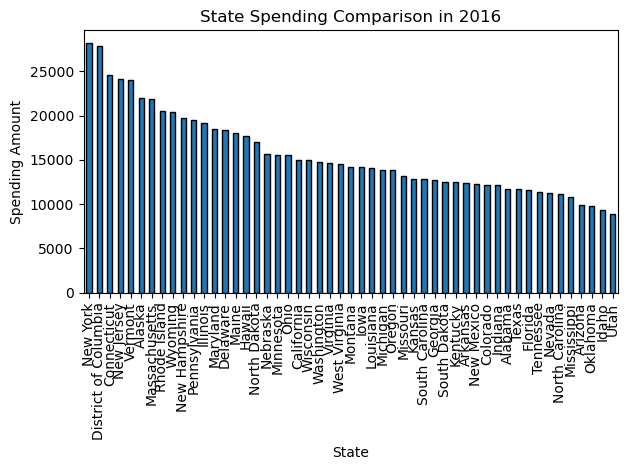

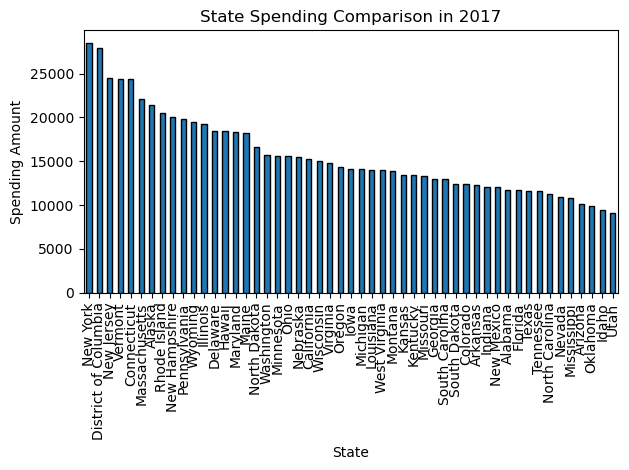

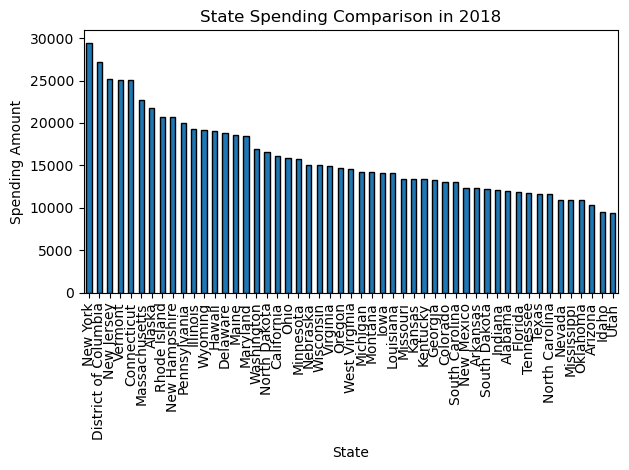

In [172]:
years = [str(y) for y in range(2011, 2019)]

for year in years:
    spending[year].sort_values(ascending=False).plot(
        kind='bar', edgecolor='black'
    )
    plt.ylabel('Spending Amount')
    plt.title(f'State Spending Comparison in {year}')
    plt.xlabel('State')
    plt.tight_layout()
    plt.show()

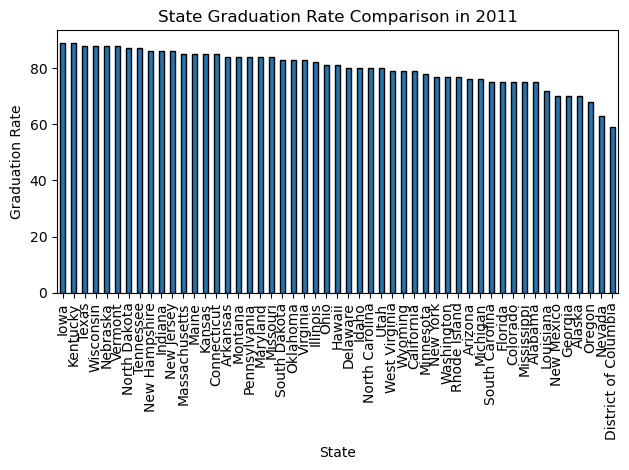

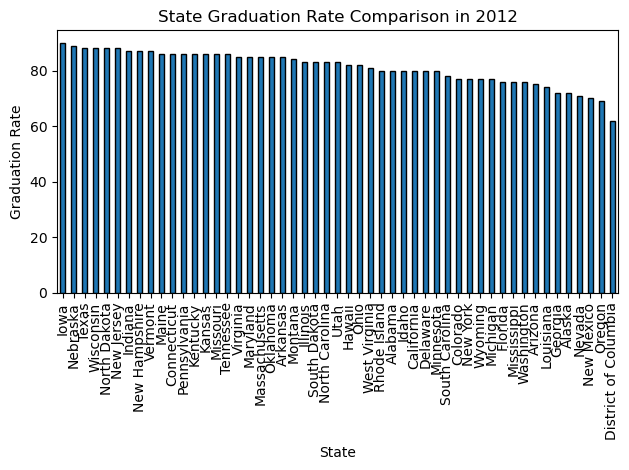

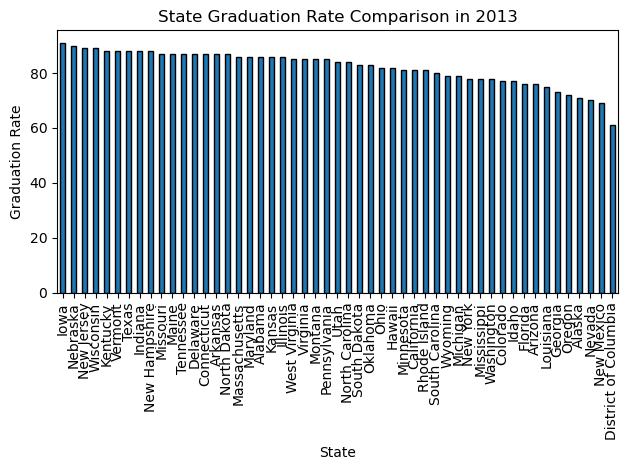

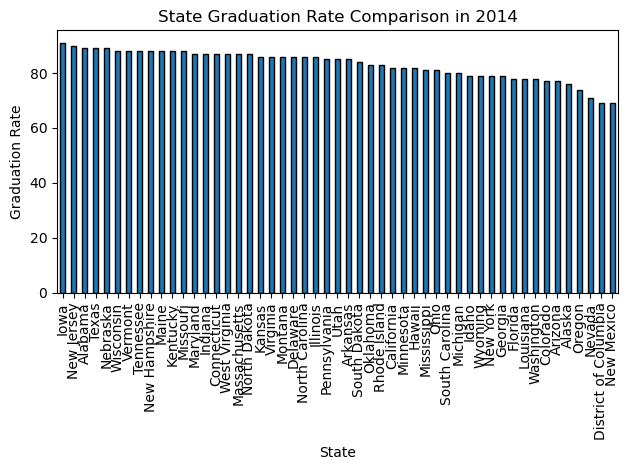

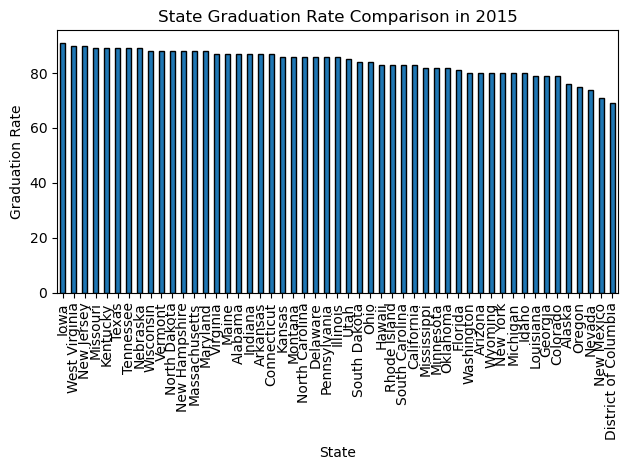

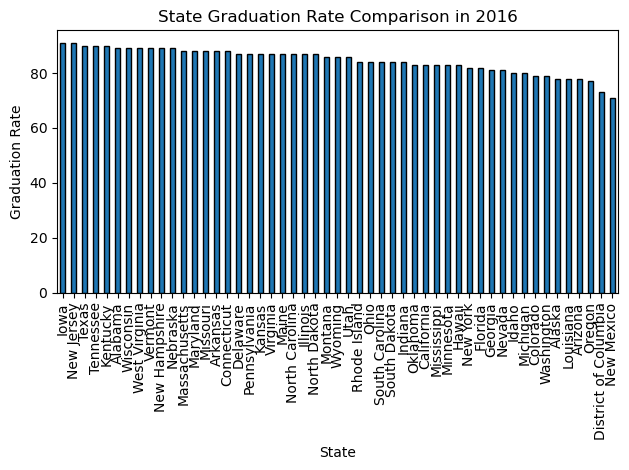

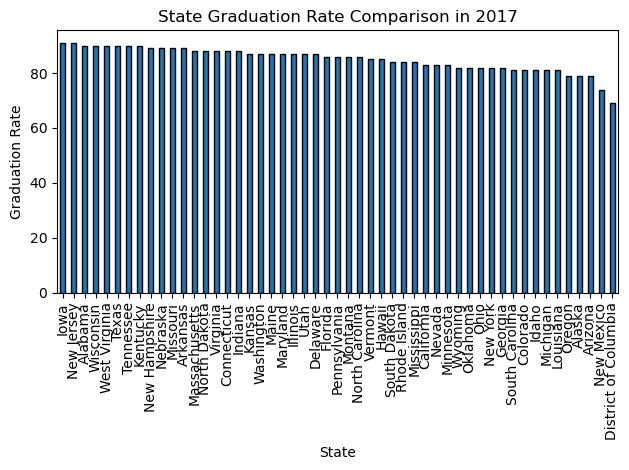

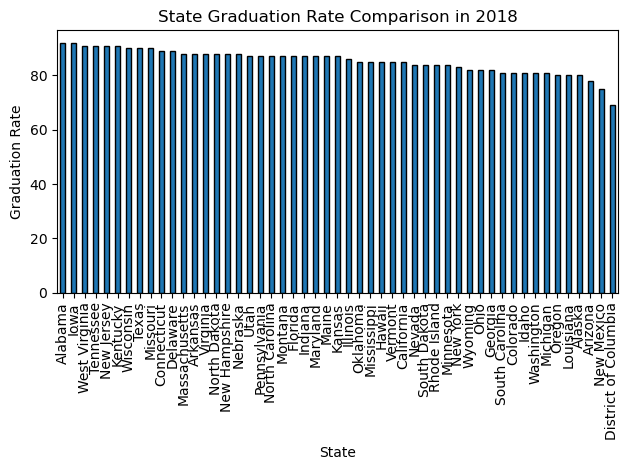

In [173]:
years = [str(y) for y in range(2011, 2019)]  # Years as strings

for year in years:
    ACGR[year].sort_values(ascending=False).plot(
        kind='bar', edgecolor='black'
    )
    plt.ylabel('Graduation Rate')
    plt.title(f'State Graduation Rate Comparison in {year}')
    plt.xlabel('State')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### So the general trend is that there is a distribution year-to-year between 90% and 75% graduation rate.  The position of the states shuffles, but the trend is fairly straightforward; there are no major outliers or unexpected shifts.
#### Let's see how it compares to the pattern for graduation rates.

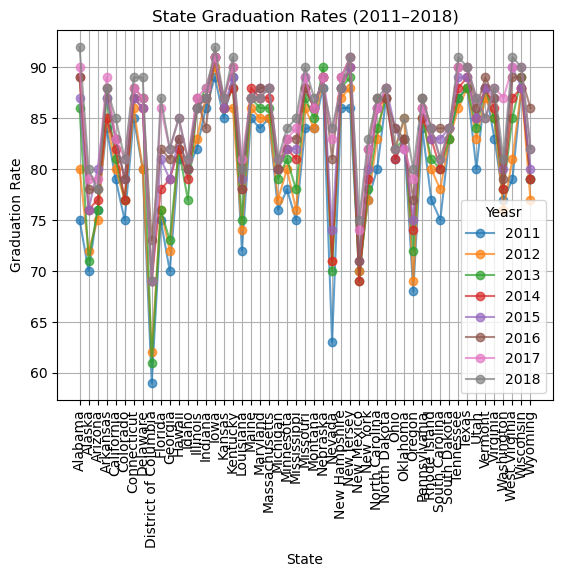

In [174]:
years = [str(y) for y in range(2011, 2019)]

# Transposing them will make it easier to read
ACGR_sorted = ACGR[years].copy()

for year in years:
    plt.plot(ACGR_sorted.index, ACGR_sorted[year], label=year, marker='o', alpha=0.7)

plt.ylabel('Graduation Rate')
plt.title('State Graduation Rates (2011–2018)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.legend(title="Yeasr")
plt.grid(True)
plt.show()

### We can see that, while each state individually is quite different from others, overall they don't have too much deviation in their own numbers.  It's not very clear and we don't need much detail for this part.

### It should be noted, though that though there is a  wide varation in spending per student, the plot of the graduation rates did not have this much variability do it!

### We can look at state spending over time, but there is too much to really see many patterns.

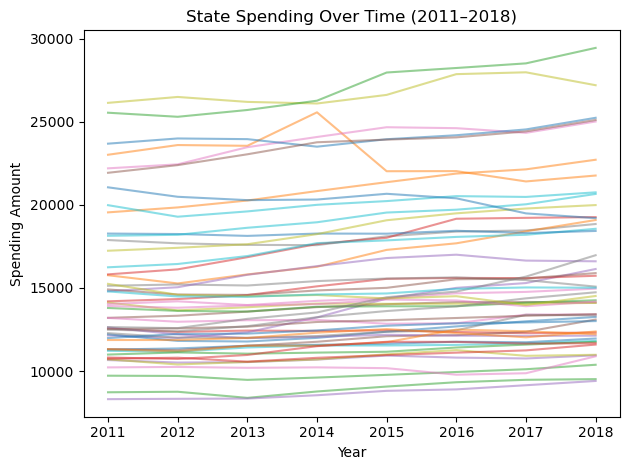

In [175]:
years = [str(y) for y in range(2011, 2019)]
spending[years].T.plot(legend=False, alpha=0.5)
plt.ylabel('Spending Amount')
plt.title('State Spending Over Time (2011–2018)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### So instead let's take a look at the rate of change:

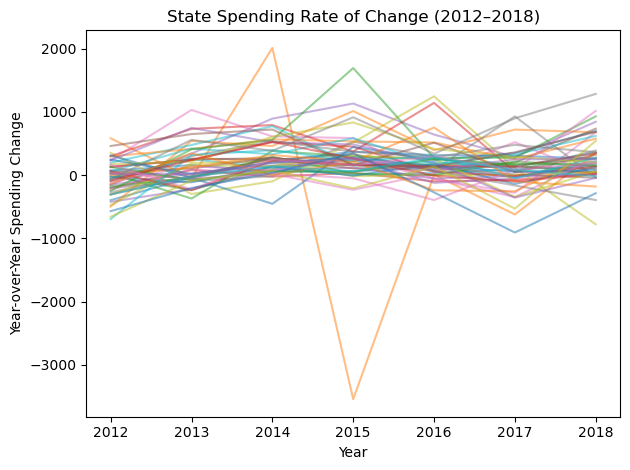

In [176]:
years = [str(y) for y in range(2011, 2019)]

spending_diff = spending[years].T.diff().dropna()

spending_diff.plot(legend=False, alpha=0.5)
plt.ylabel('Year-over-Year Spending Change')
plt.title('State Spending Rate of Change (2012–2018)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### With very few exceptions, the overall trend seems to be maintaining a small increase in spending over time.

##### Let's take a closer look at the numbers!

In [177]:
#Making and then plotting a table of the change in spending from the beginning to end:

spending['2011-2018 Change'] = spending['2018'] - spending['2011']

diff_table = spending[['2011-2018 Change']]
print(diff_table.head())

            2011-2018 Change
State                       
Alabama                  664
Alaska                 -1250
Arizona                  658
Arkansas                -238
California              3999


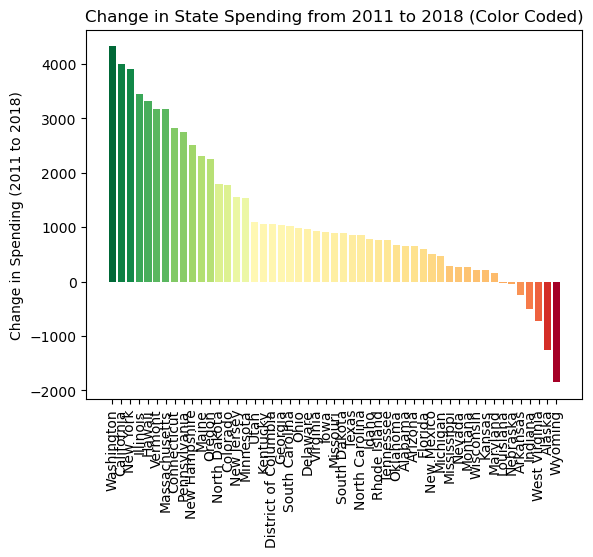

In [178]:
diff_table_sorted = diff_table.sort_values('2011-2018 Change', ascending=False)

# This will be for colormap scaling
changes = diff_table_sorted['2011-2018 Change']

# Normalizing values to a range for colormap (diverging between red and green, red representing lower expenditures and green representing an increase)
norm = plt.Normalize(changes.min(), changes.max())
colors = cm.RdYlGn(norm(changes))  # Red-Yellow-Green colormap

plt.bar(diff_table_sorted.index, changes, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Change in Spending (2011 to 2018)')
plt.title('Change in State Spending from 2011 to 2018 (Color Coded)')
plt.show()

state_colors = dict(zip(diff_table_sorted.index, colors))


### Some states have DECREASED spending over time, but recall that overall graduation rates have risen during this timeframe!   So now we'll see how successful their expenditures have been.

#### (This data has already accounted for inflation)

In [179]:
ACGR['2011-2018 Change'] = ACGR['2018'] - ACGR['2011']

# Create a table showing just the change
grad_diff_table = ACGR[['2011-2018 Change']]
print(grad_diff_table.head())

Year        2011-2018 Change
State                       
Alabama                   17
Alaska                    10
Arizona                    2
Arkansas                   4
California                 6


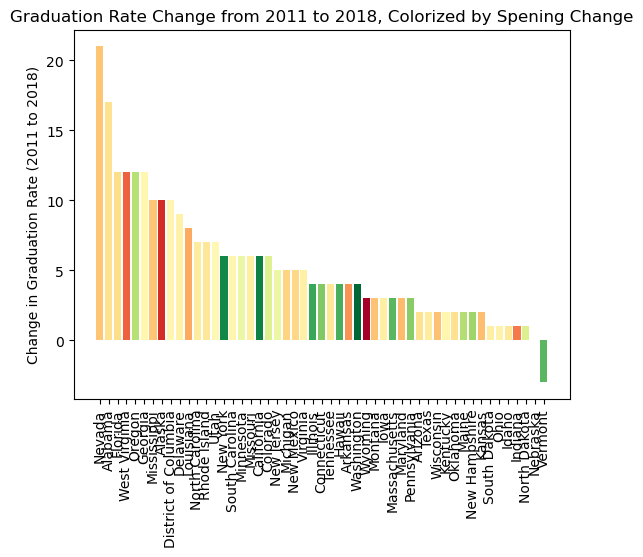

In [180]:
grad_diff_sorted = grad_diff_table.sort_values('2011-2018 Change', ascending=False)
spending_changes = diff_table_sorted['2011-2018 Change']

#All the states keep their color from the pending plot
# If something goes wrong, it will be black
grad_bar_colors = [state_colors.get(state, 'black') for state in grad_diff_sorted.index]

plt.bar(grad_diff_sorted.index, grad_diff_sorted['2011-2018 Change'], color=grad_bar_colors)
plt.xticks(rotation=90)
plt.ylabel('Change in Graduation Rate (2011 to 2018)')
plt.title('Graduation Rate Change from 2011 to 2018, Colorized by Spening Change')
plt.show()

### The color-coding reveals how spending changes connect to performance.

###### Each bar in the chart represents the **change in graduation rate** from 2011 to 2018, while the **color** indicates the change in spending:
-Green bars indicate higher increases in spending  
-Red bars indicate decreases in spending

###### Vermont, for example, had the *largest* drop in graduation rate, but is *bright green*, indicating one of the highest increases in spending (it's in the top 5 overall).  Despite increased investment, graduation rates declined the most.

###### Wyoming, on the other hand, cut more than any other state, which it is a deep red color, but can only boast a small increase in graduation rate.  Slightly below average, but still positive.


# The conclusion is that a change in spending does NOT directly correlate to academic success, either positively or negatively.

## It is frequently hoped that a sudden influx of spending will promote academic success, and it is similarly feared that a sudden decrease of spending will weigh negatively against academic success, but we can reliably trust this data against those conclusions.

### Let's now perform the same test with the absolute dollar amount spent on education, comparing, year to year to the average amount spent by each state to their own average graduation rate

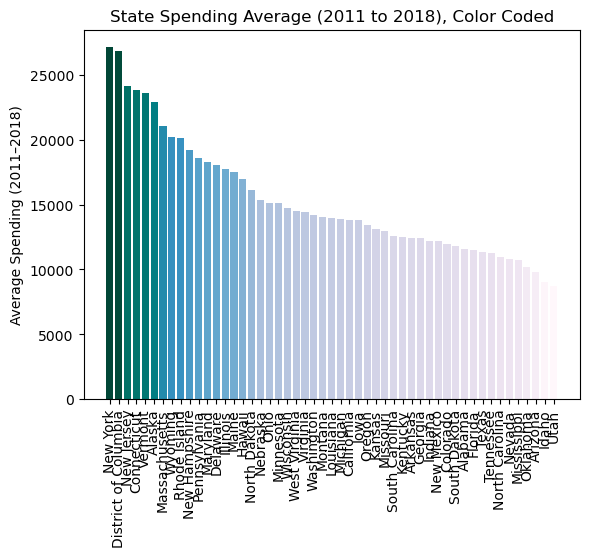

In [201]:
# Calculate the average spending from 2011 to 2018 for each state
state_avg = spending.loc[:, '2011':'2018'].mean(axis=1)

# Create a DataFrame to hold the average values
state_avg_table = pd.DataFrame({'2011-2018 Average': state_avg})

# Sort by the average in descending order
state_avg_sorted = state_avg_table.sort_values('2011-2018 Average', ascending=False)

# For colormap scaling
avg_values = state_avg_sorted['2011-2018 Average']
norm = plt.Normalize(avg_values.min(), avg_values.max())
colors = cm.PuBuGn(norm(avg_values))  # green = high average, red = low average

# Plot average spending
plt.bar(state_avg_sorted.index, avg_values, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Average Spending (2011–2018)')
plt.title('State Spending Average (2011 to 2018), Color Coded')
plt.show()

# Store these colors for consistent mapping
state_colors = dict(zip(state_avg_sorted.index, colors))

In [194]:
acgr_avg = ACGR.mean(axis=1)

In [195]:
acgr_avg_sorted = acgr_avg.sort_values(ascending=False)

In [203]:
spending_for_acgr = state_avg_sorted.reindex(acgr_avg_sorted.index)
norm = plt.Normalize(state_avg_sorted.min(), state_avg_sorted.max())
colors = cm.PuBuGn(norm(spending_for_acgr.values))

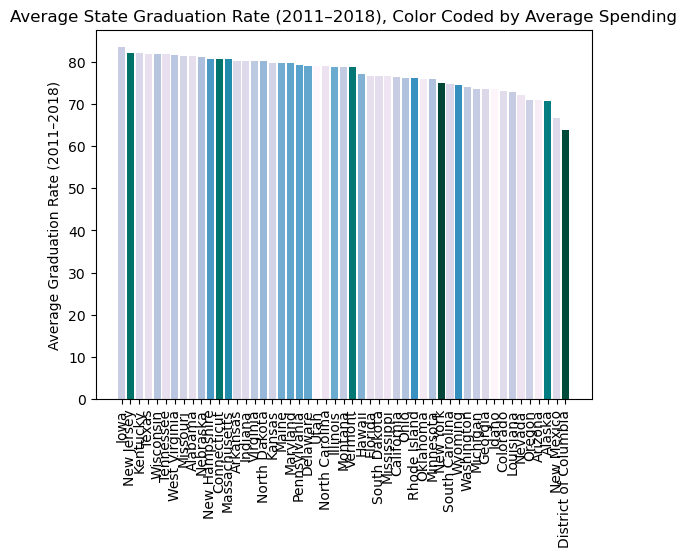

In [204]:
plt.bar(acgr_avg_sorted.index, acgr_avg_sorted.values, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Average Graduation Rate (2011–2018)')
plt.title('Average State Graduation Rate (2011–2018), Color Coded by Average Spending')
plt.show()

# Once again, we see that the dollar amount spent per student does not guarantee a higher graduation rate.

## D.C. and New Jersey both spent higher-than-average dollar amounts per student compared to other states, but are on opposite ends of the plot represnting the graduation rate.

## Initial impressions from the side-by-side plots do suggest a strong correlation between spending and academic achievement.

### However, the Pearson correlation values reveal the hidden truth that our tables have confirmed:

###### While some relationship may exist, the data provides enough evidence to conclude that **increasing spending does not guarantee improved graduation rates**, just as **decreasing spending does not necessarily lead to a decline** in graduation outcomes.


# As such, no recommendation nor guarantee can be provided as to whether or not a change in funding (most commonly, an increase) will result in higher graduation rates.

### Let's take a look at where schools are trending in terms of graduation.  If we were to compare the best school against the worst in order to determine those factors that contribute most highly to graduation rates, where should our focus be?

In [210]:
years = ACGR.columns.astype(int)
future_years = np.arange(years.max() + 1, years.max() + 4)  #We're going to predict the next 3 years.

In [211]:
actual_years_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
future_years_list = [2019, 2020, 2021]

lr_forecasts = pd.DataFrame(index=ACGR.index, columns=future_years_list)
rf_forecasts = pd.DataFrame(index=ACGR.index, columns=future_years_list)

# Fit and predict for each state
for state in ACGR.index:
    y = ACGR.loc[state, [str(y) for y in actual_years_list]].values.astype(float)
    X = np.array(actual_years_list).reshape(-1, 1)

    X_future = np.array(future_years_list).reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X, y)
    lr_forecasts.loc[state] = lr.predict(X_future)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_forecasts.loc[state] = rf.predict(X_future)

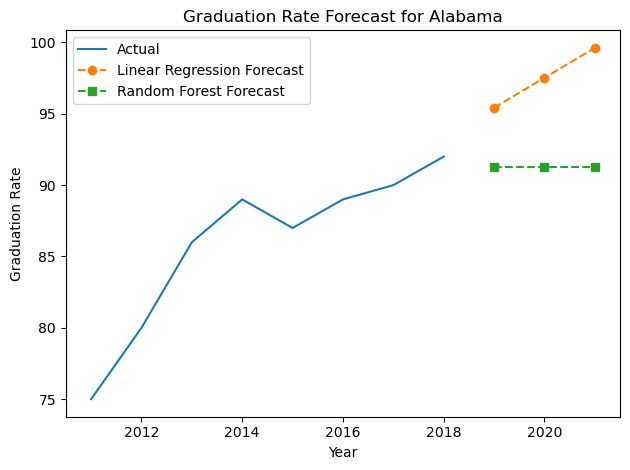

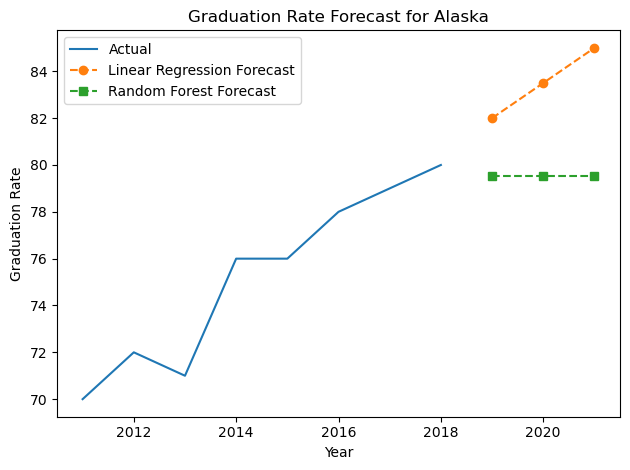

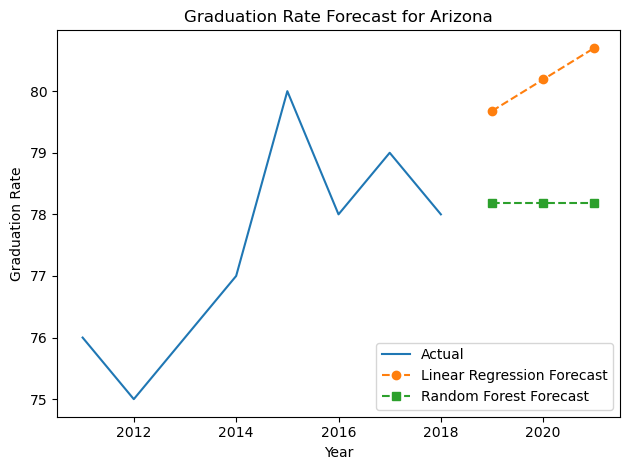

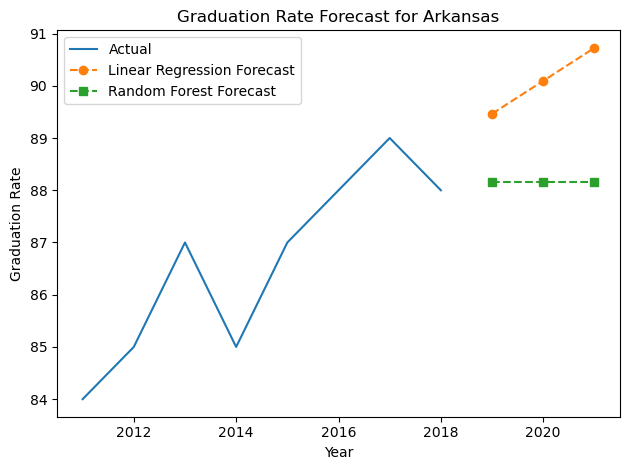

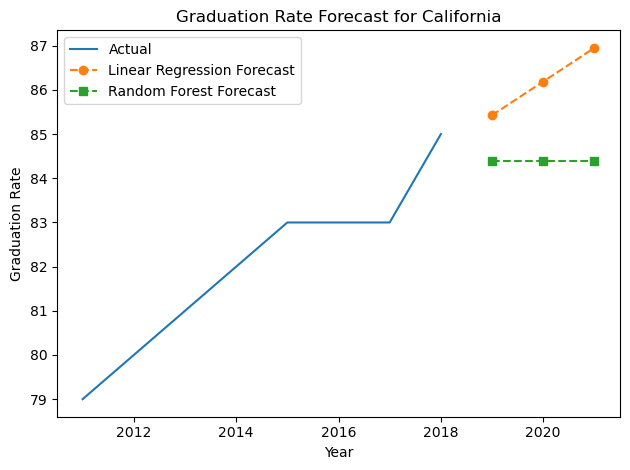

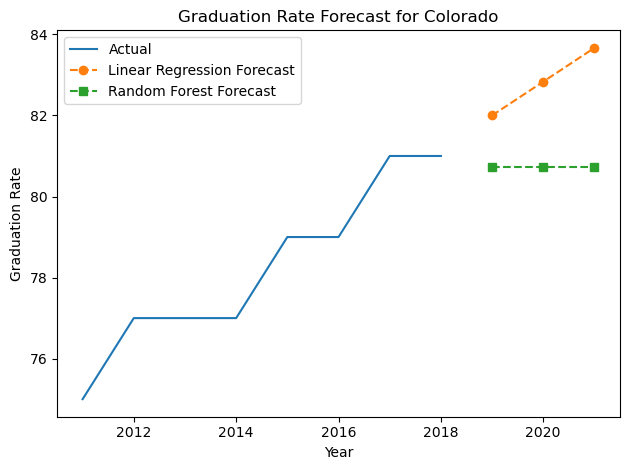

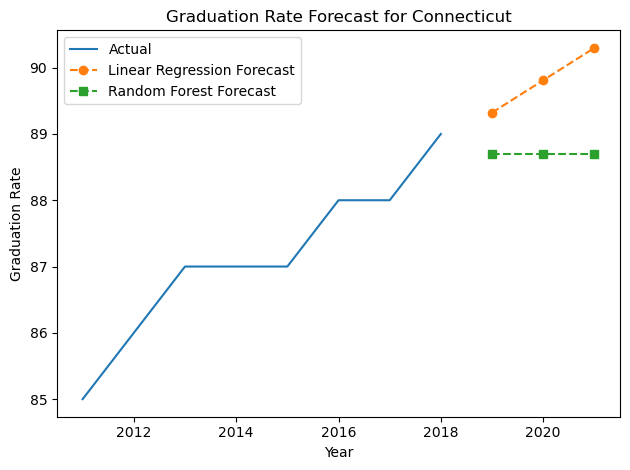

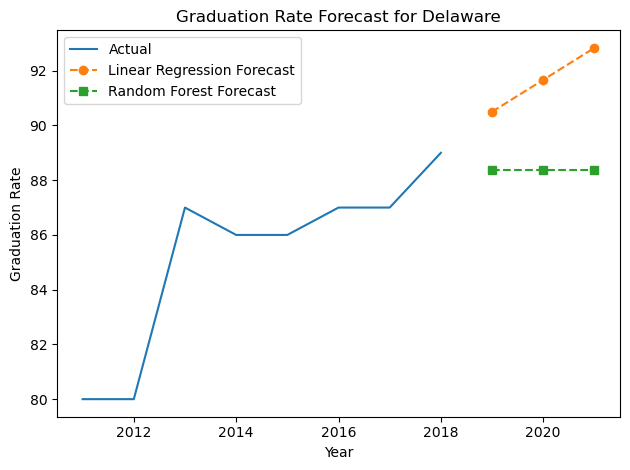

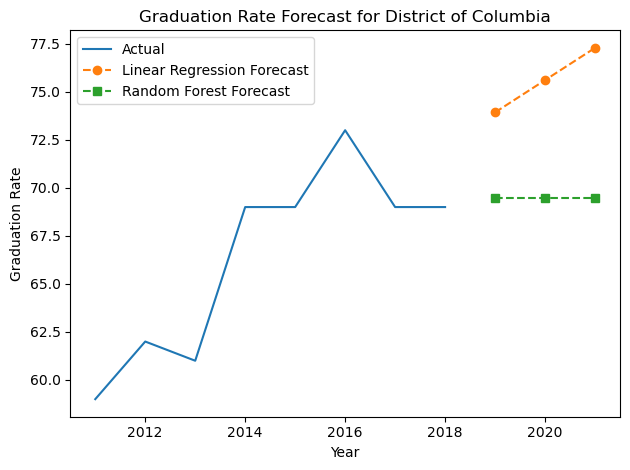

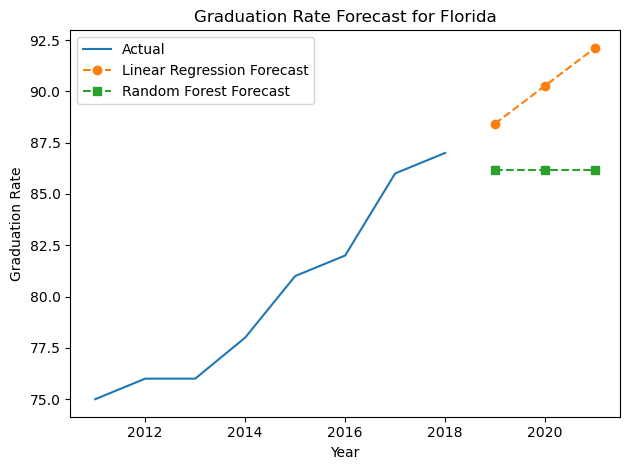

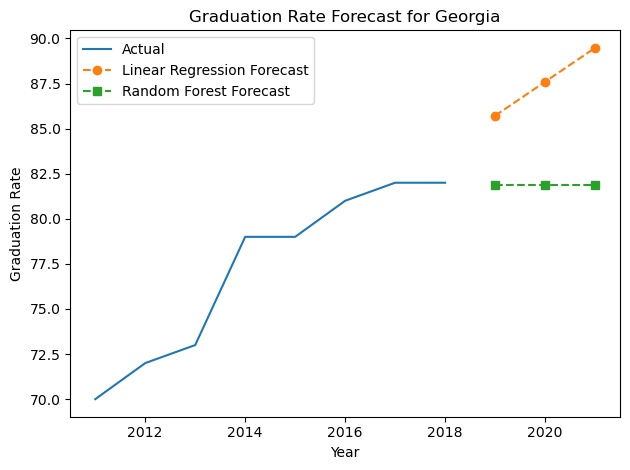

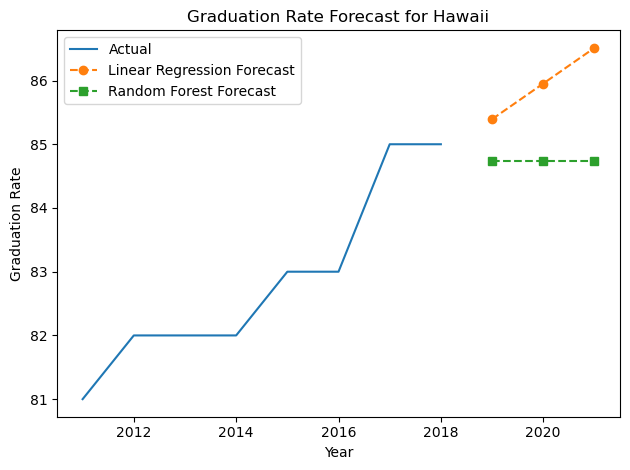

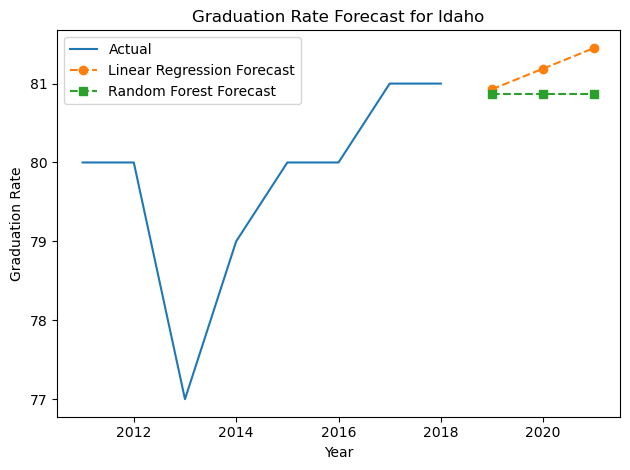

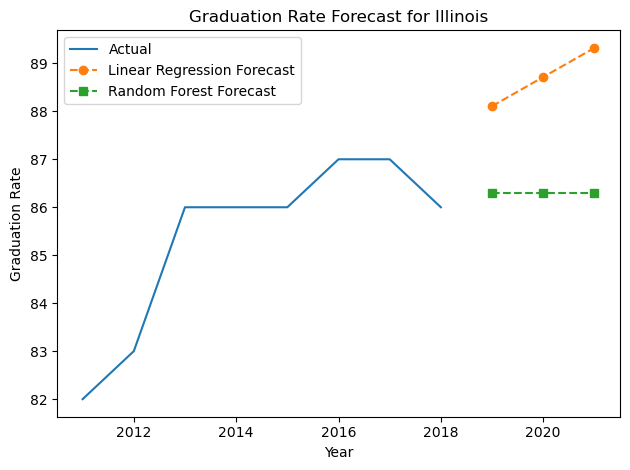

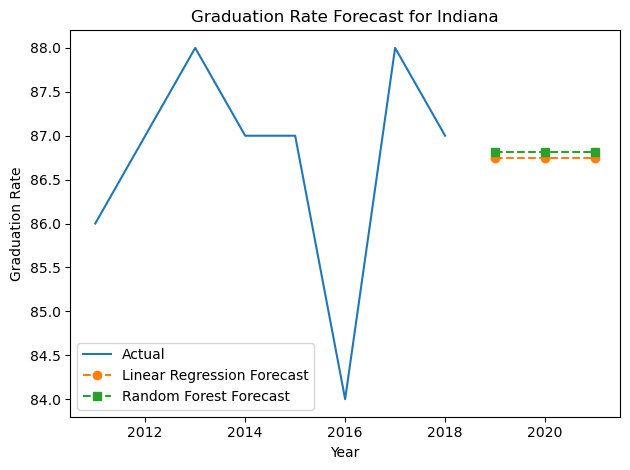

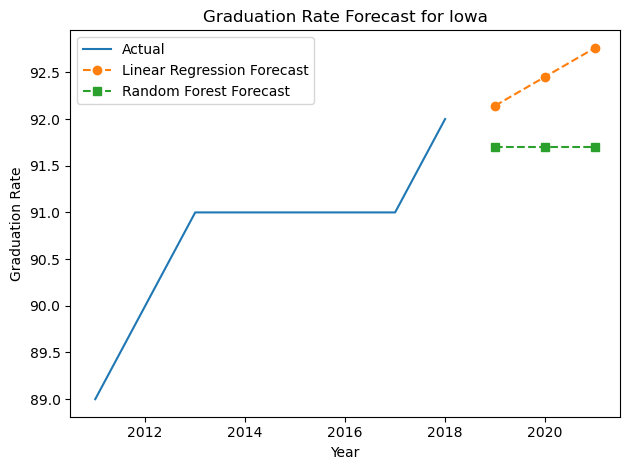

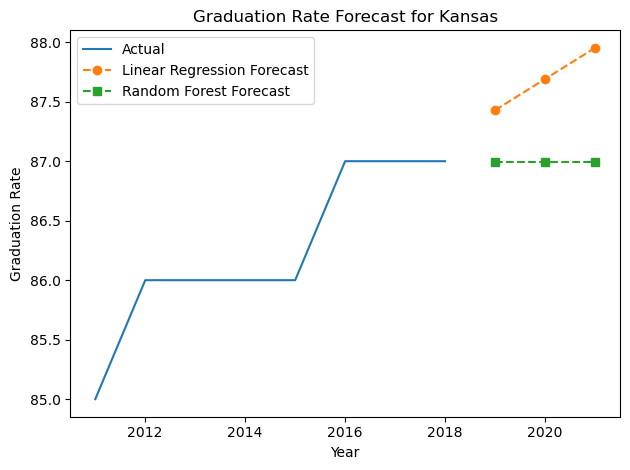

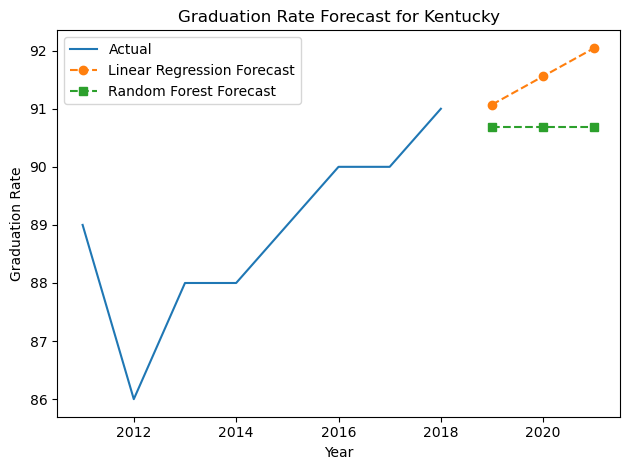

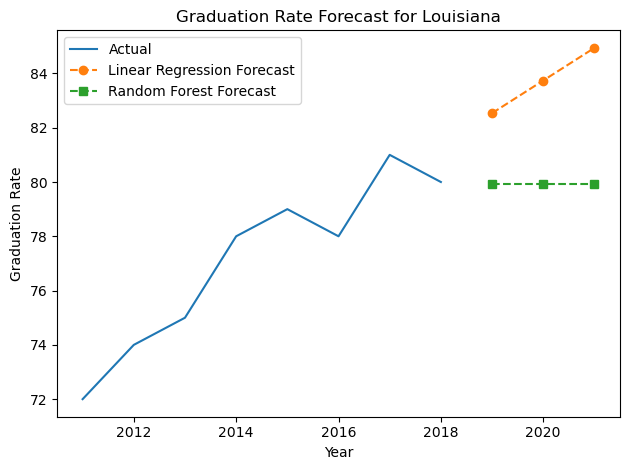

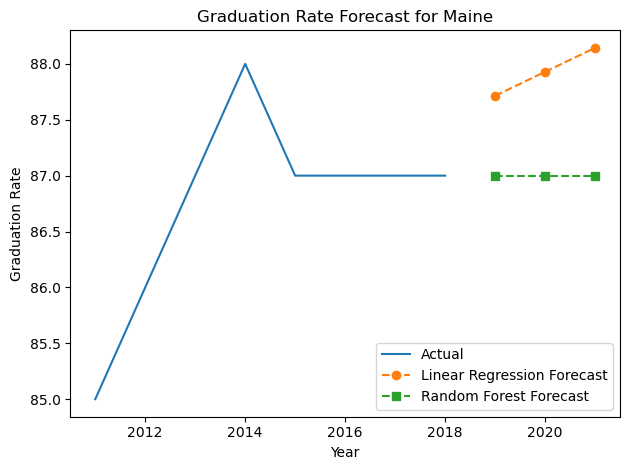

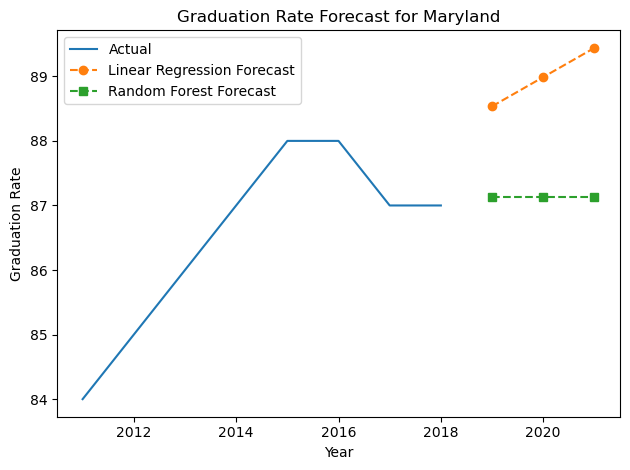

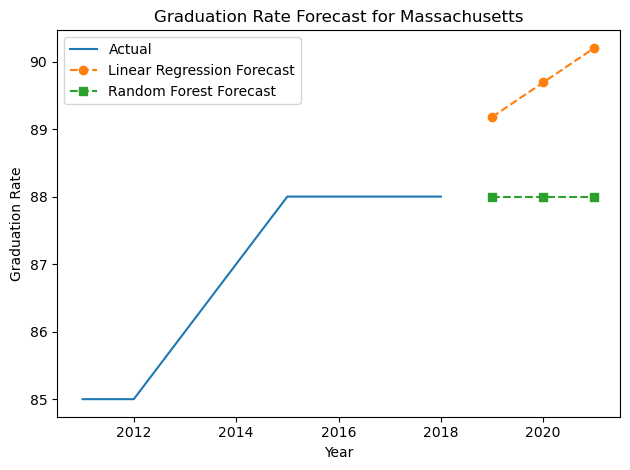

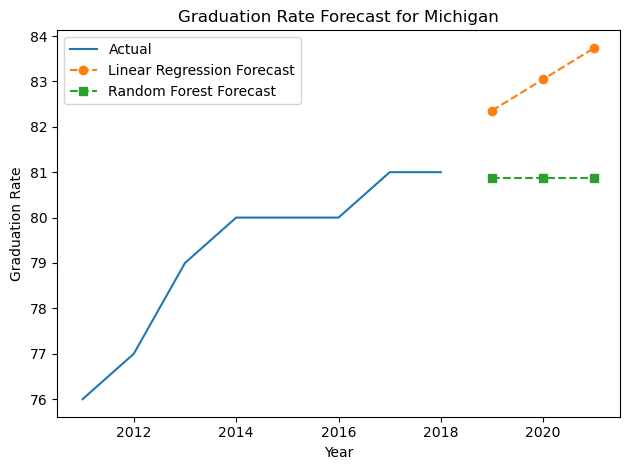

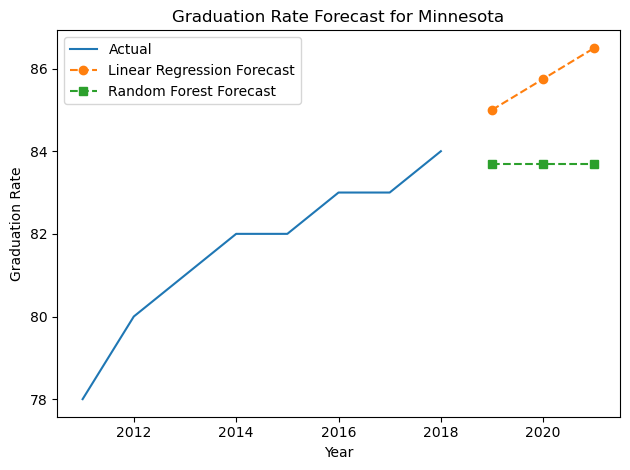

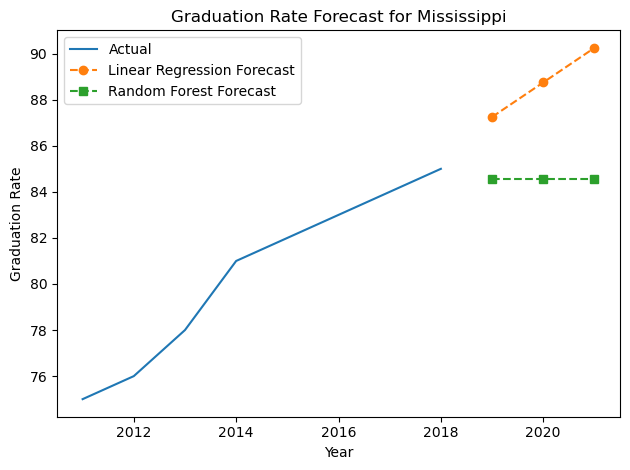

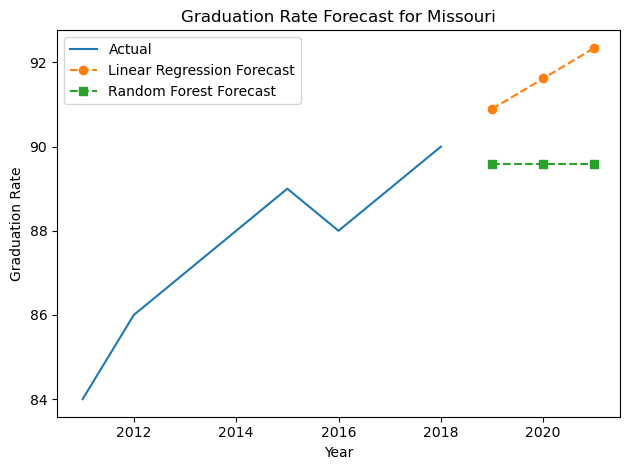

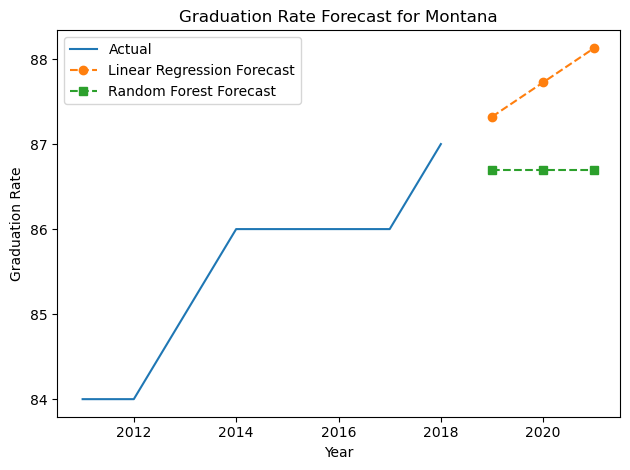

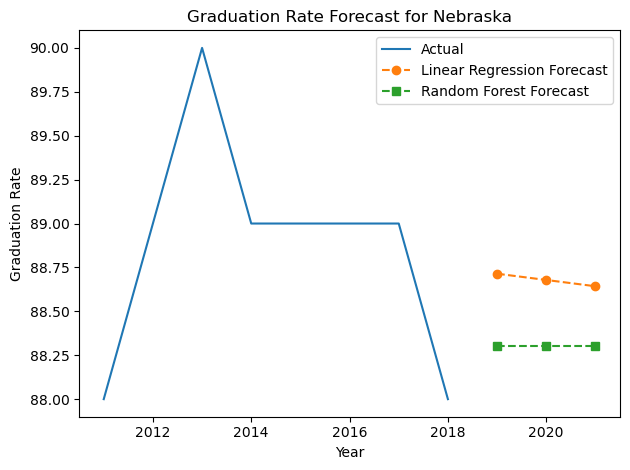

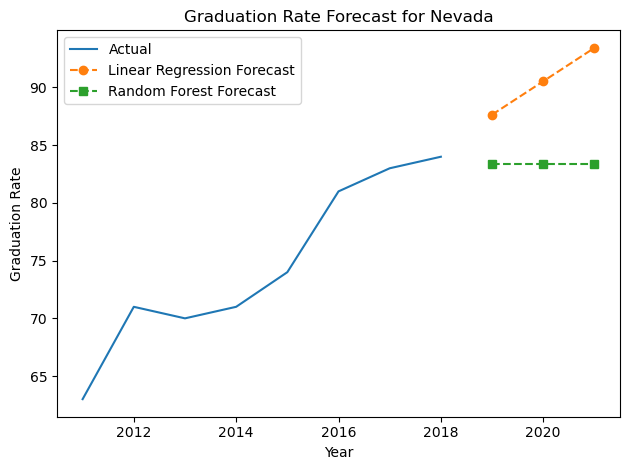

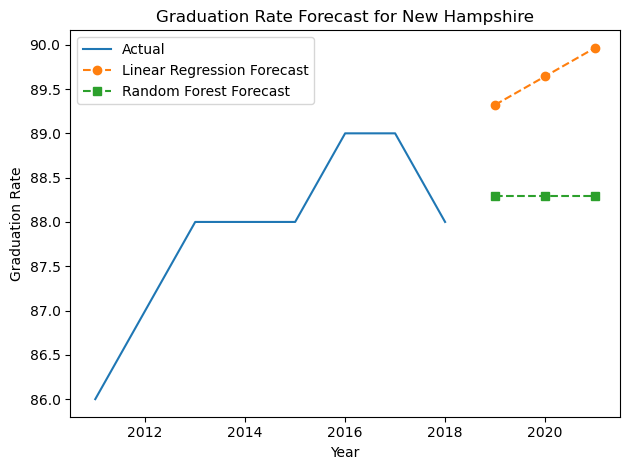

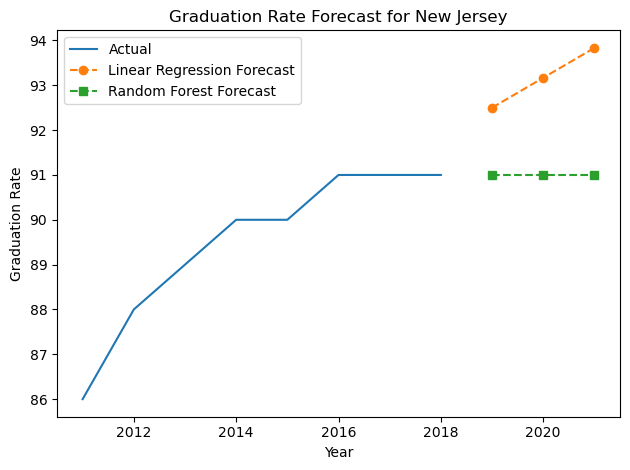

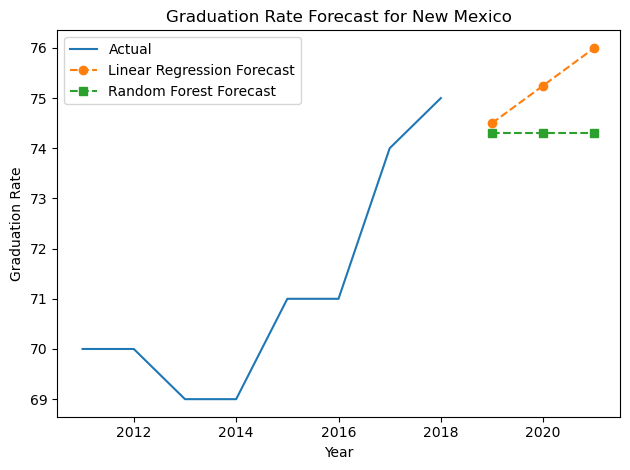

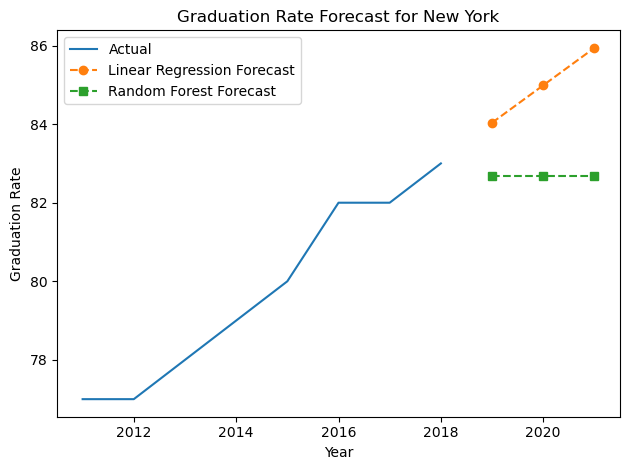

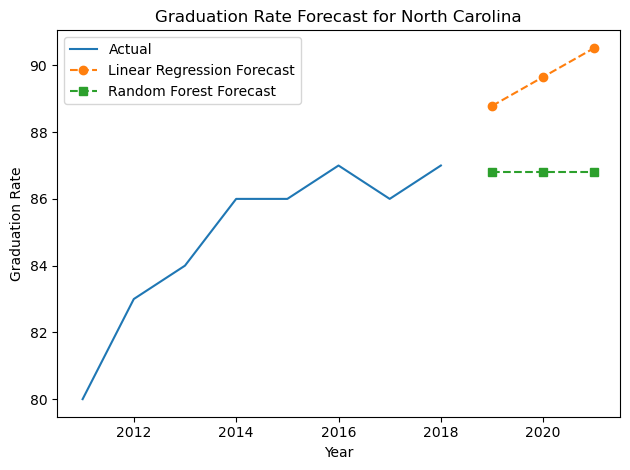

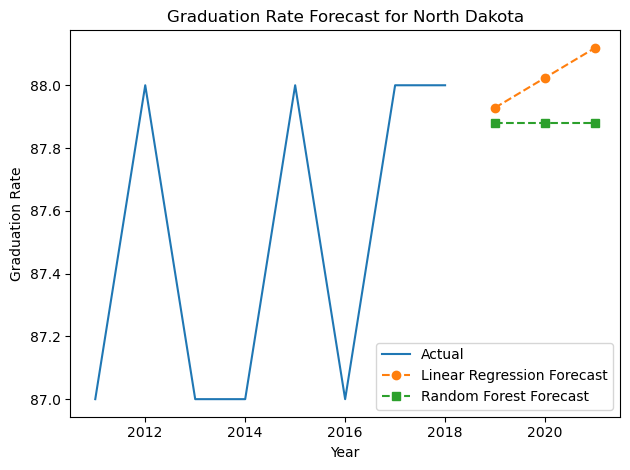

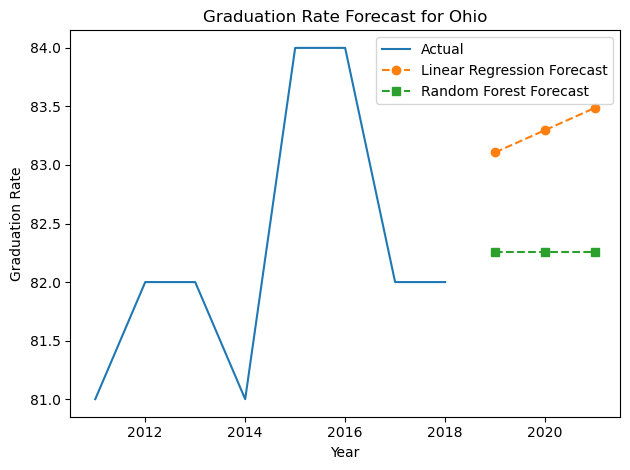

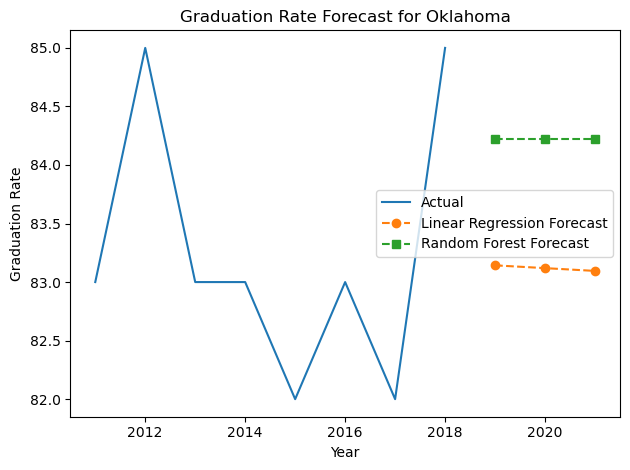

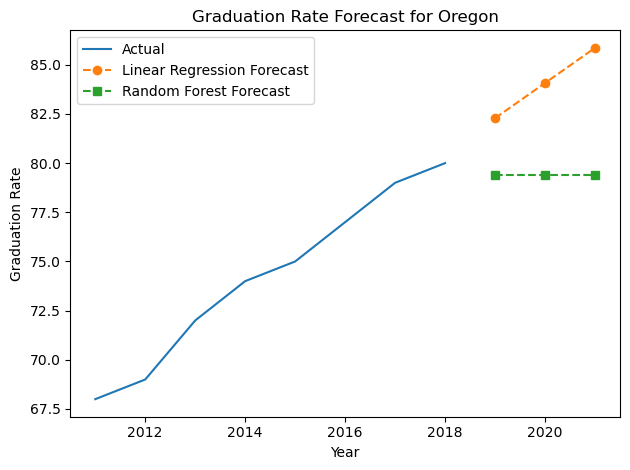

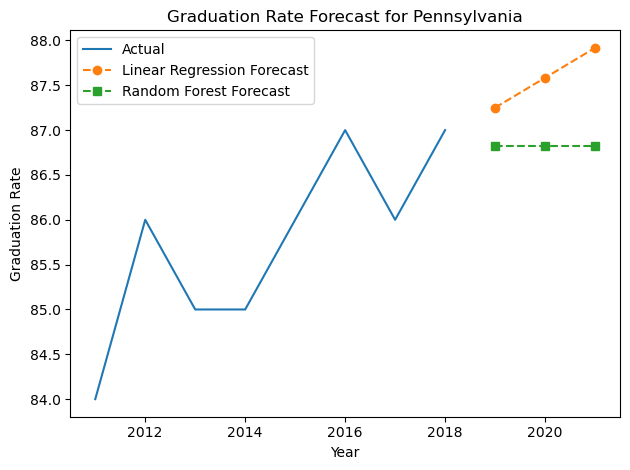

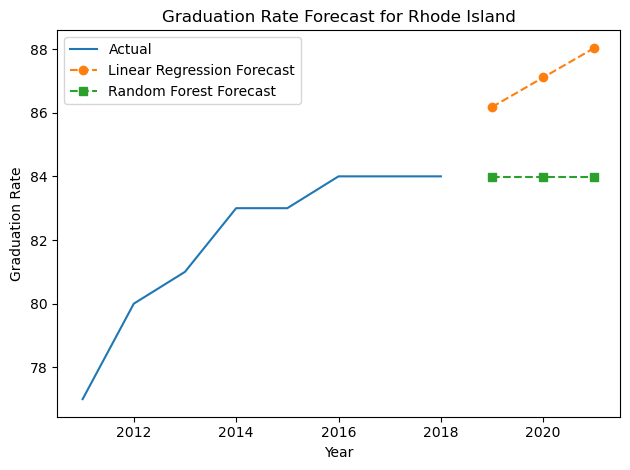

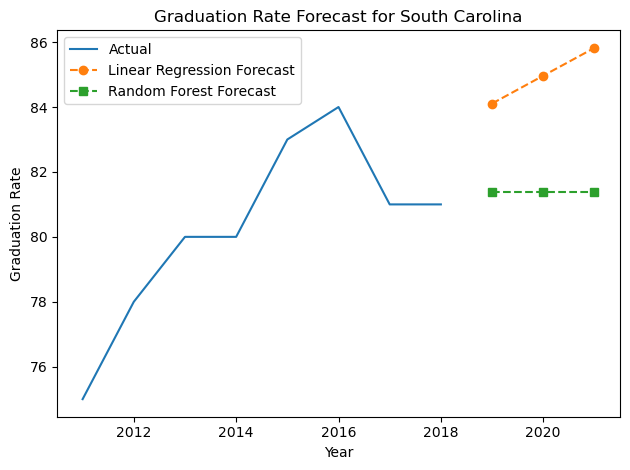

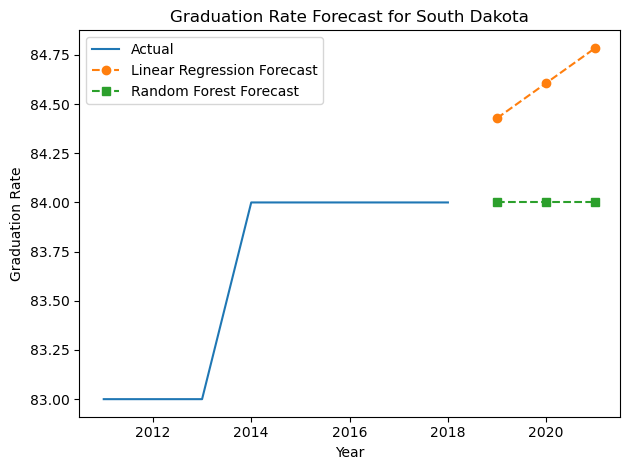

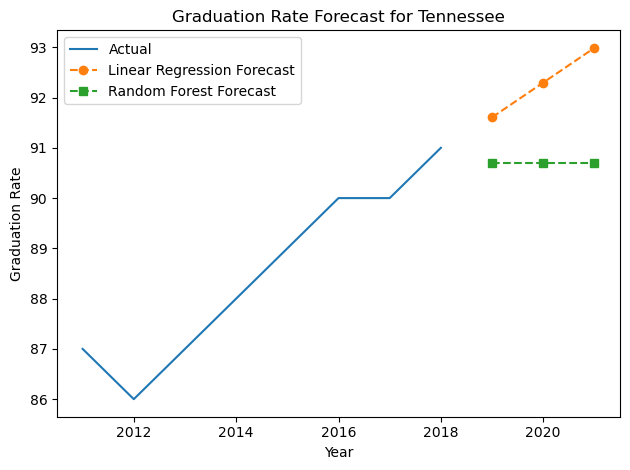

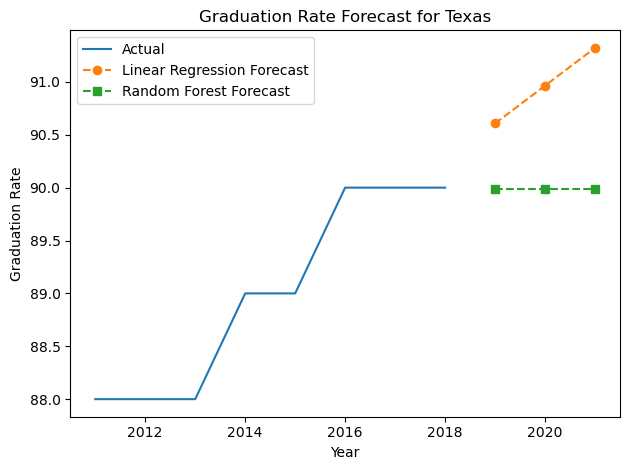

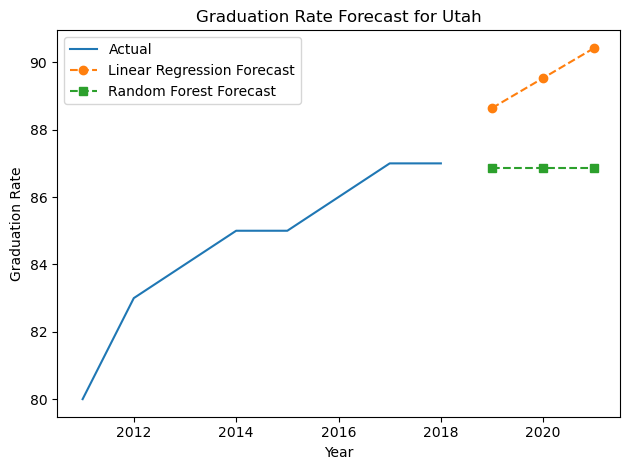

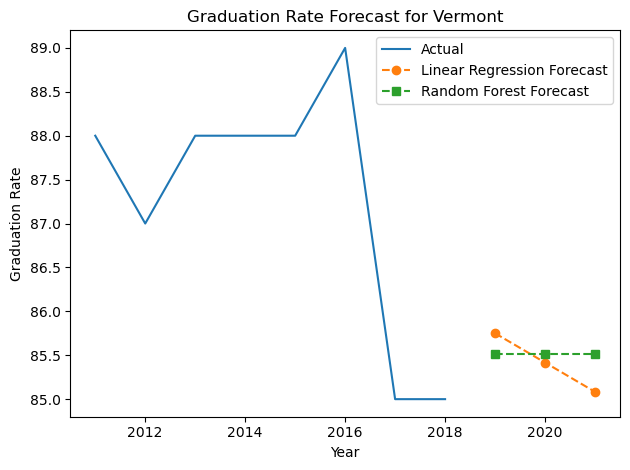

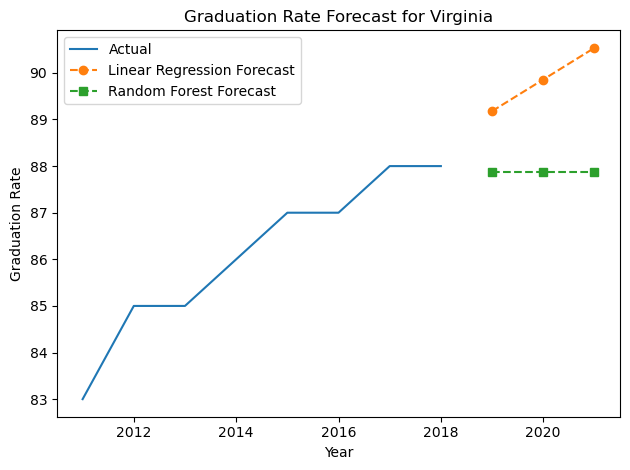

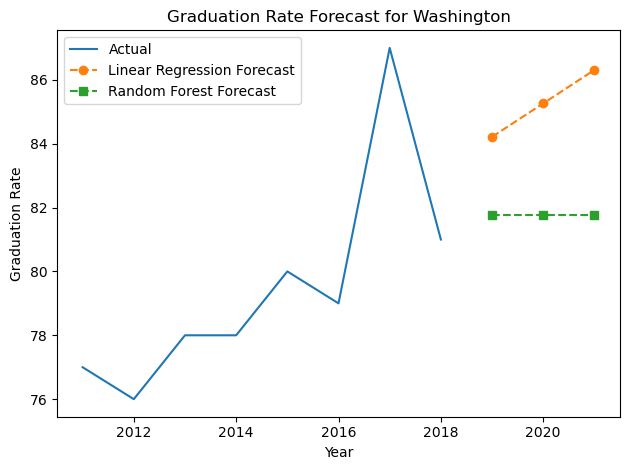

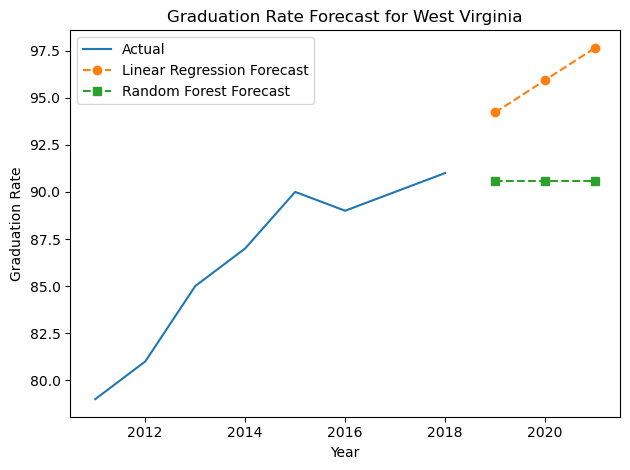

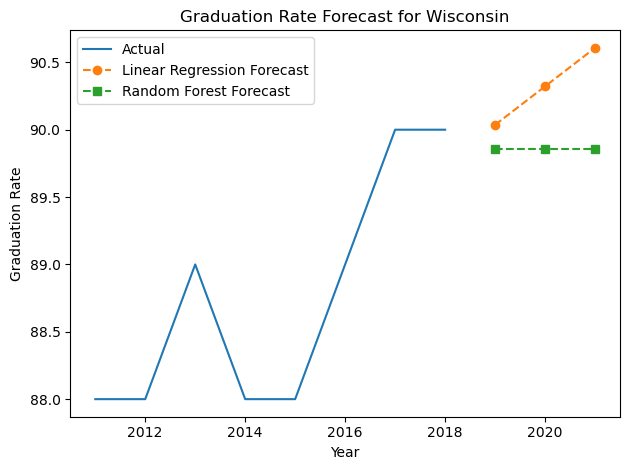

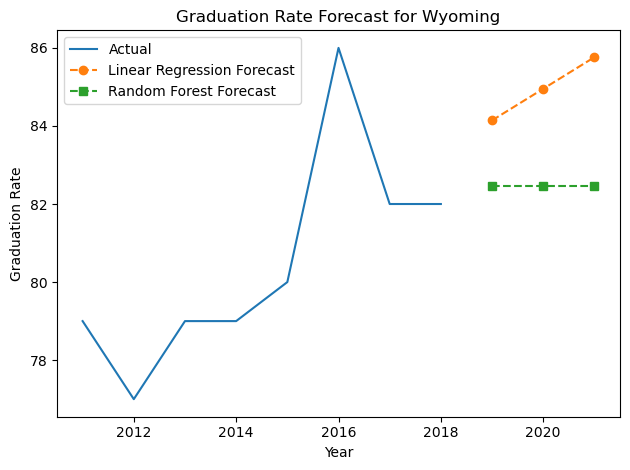

In [212]:
for state in ACGR.index:
    plt.plot(actual_years_list, ACGR.loc[state, [str(y) for y in actual_years_list]], label='Actual')
    
    plt.plot(future_years_list, lr_forecasts.loc[state], 'o--', label='Linear Regression Forecast')
    
    plt.plot(future_years_list, rf_forecasts.loc[state], 's--', label='Random Forest Forecast')
    
    plt.xlabel('Year')
    plt.ylabel('Graduation Rate')
    plt.title(f'Graduation Rate Forecast for {state}')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### The Random Forest Forecast doesn't predict any upward trend in graduation rate, so we'll use the Linear Regression Forecast numbers instead to see which school is likely to have the greatest potential graduation rate, as well as the lowest.

In [213]:
last_year = lr_forecasts.columns[-1]

last_year_forecasts = lr_forecasts[last_year]

highest_state = last_year_forecasts.idxmax()
highest_value = last_year_forecasts.max()

lowest_state = last_year_forecasts.idxmin()
lowest_value = last_year_forecasts.min()

print(f"{highest_state} has the highest estimated graduation rate at {highest_value:.2f}")
print(f"{lowest_state} has the lowest estimated graduation rate at {lowest_value:.2f}")

Alabama has the highest estimated graduation rate at 99.62
New Mexico has the lowest estimated graduation rate at 76.00


# As we've already determined, funding does not directly correlate with graduation rates.  So if we were to make a recommendation about where funding would be most useful, it is recommended to send it to Alabama.

# In similar fashion, New Mexico shows the lowest potential graduation rate in the future.  While it feels counter-intuitive to suggest not providing additional funding to a state whose schools are struggling, we have already successfully disproven the correlation between spending and graduation rates.

###### In light of this information, I am forced to wonder if, perhaps, West Virginia disproportionately allows underqualified students to graduate, which would also yield this result, but that is something I cannot investigate at this time.  If I were to do so, I would need to find the additional data measuring academic success that would account for that.  "Reading level" or "Quality of Education" for example.

*Source:  US Department of Education, National Center for Education Statistics